# Проект: Обучение с учителем: качество модели
**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и нам предстоит побыть в роли стажёра в этом отделе. 
Итак, нашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Как решать задачу**

Продумывать подход к решению этой задачи нам не придётся — руководитель отдела его уже сформировал:
1.	Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2.	Нужно собрать данные по клиентам по следующим группам: 
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.
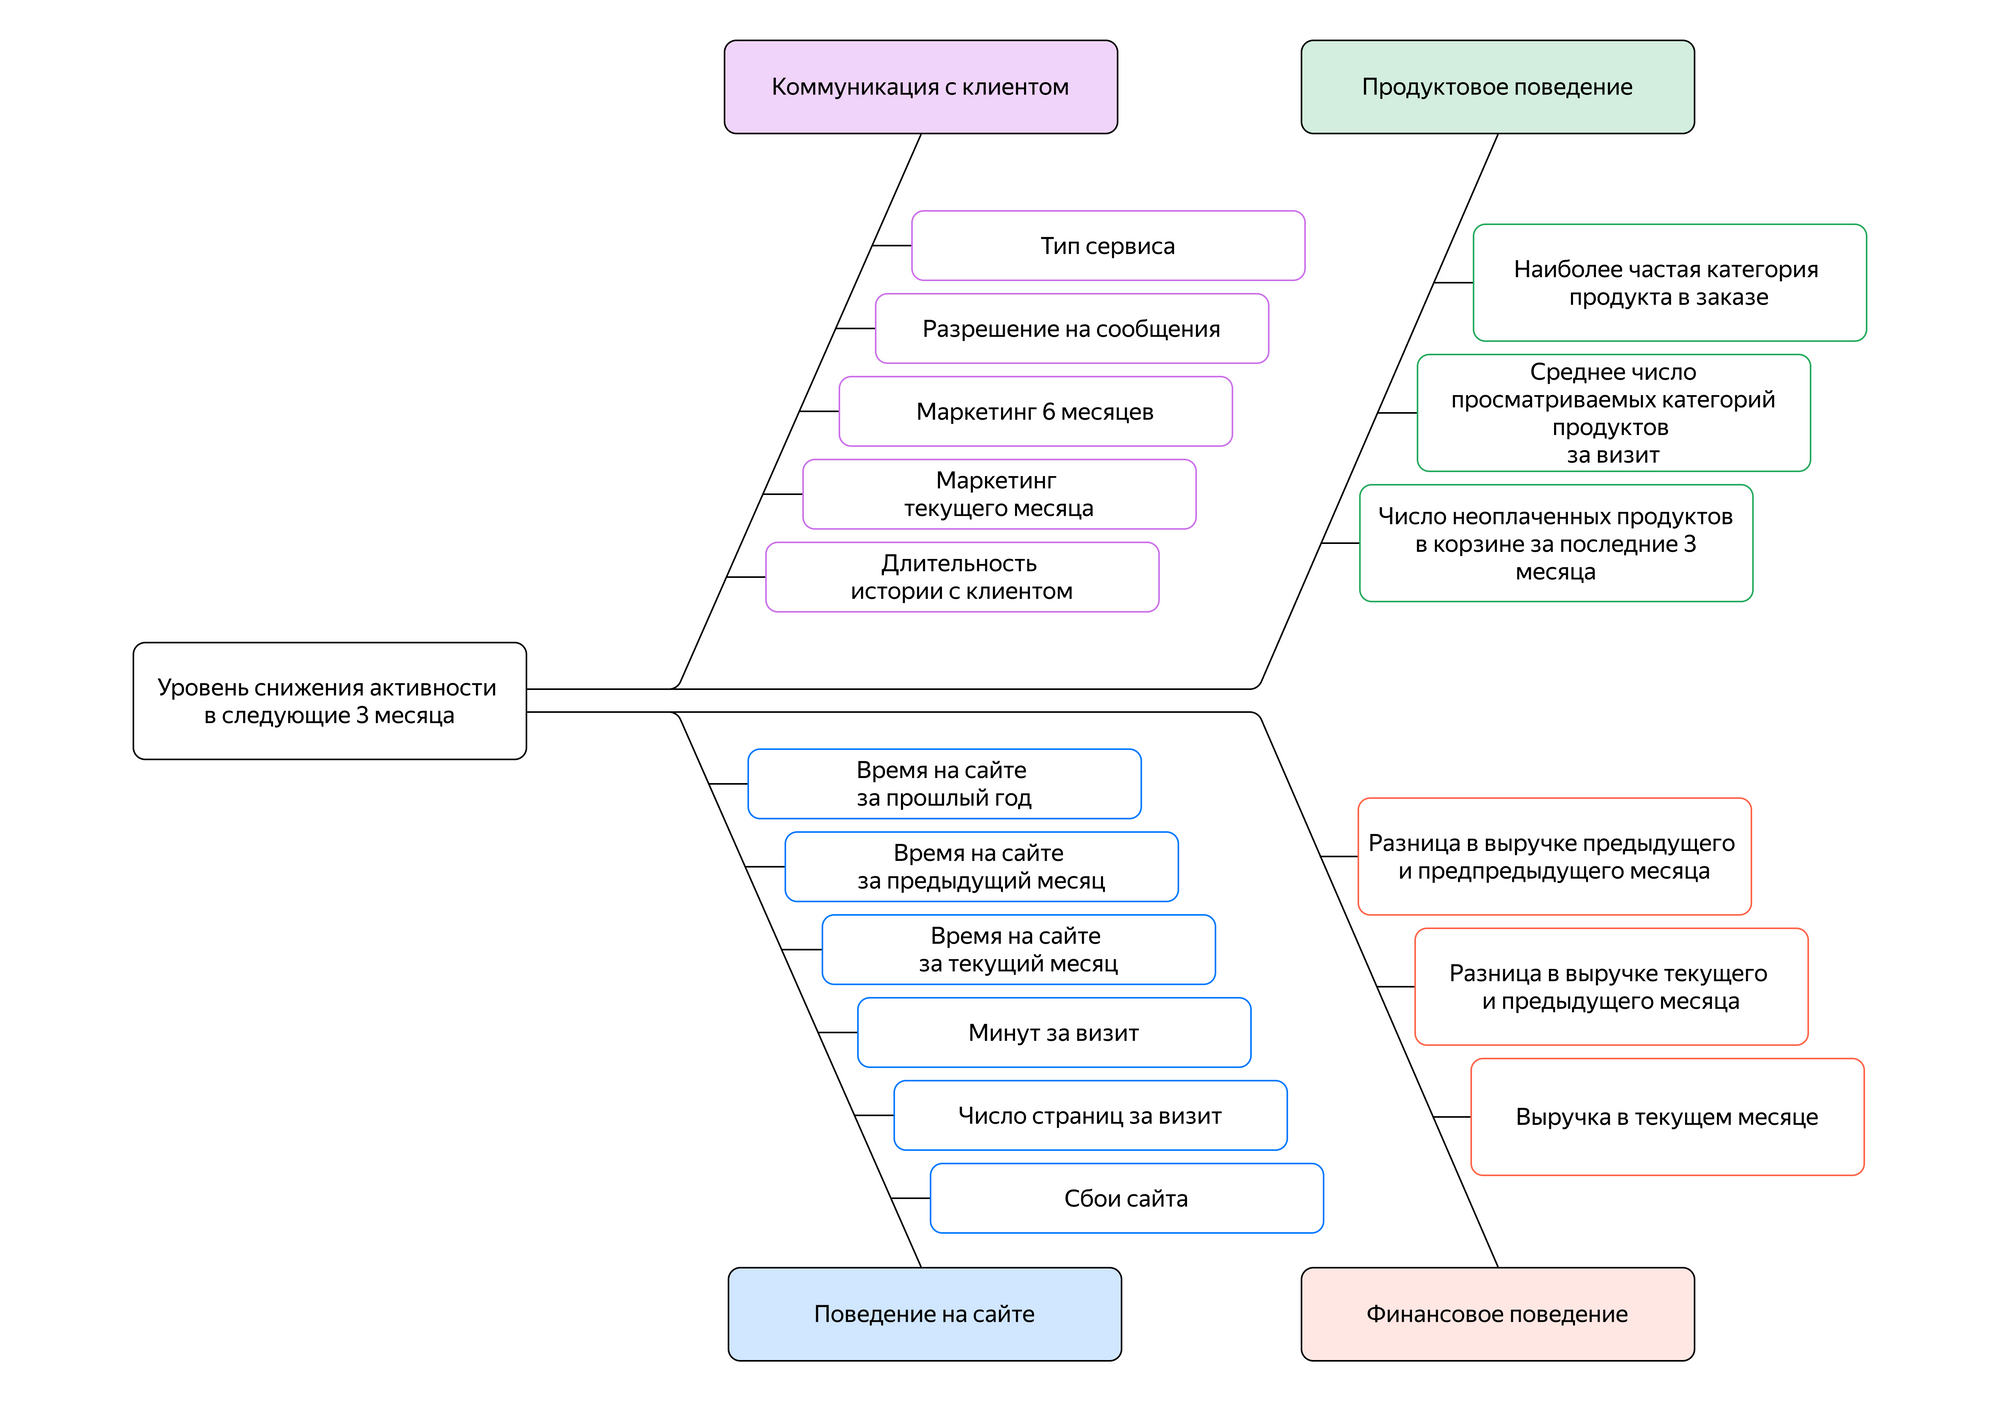

**Руководство одобрило описание решения:** 
1.	Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2.	В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3.	Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

## Описание данных
Данные для работы находятся в нескольких таблицах:

**market_file.csv** - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv** - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

**market_time.csv** - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

**money.csv** - таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

## Дополнительная инструкция для выполнения проекта
Решать задачу необходимо в два этапа:
1.	Разработать модель, которая предскажет вероятность снижения покупательской активности.
2.	Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. Использовать данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). По желанию можно проанализировать больше одного сегмента. Ниже несколько примеров сегментов, но также можно выделить свой: 
- Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
- Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
- Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
- Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

# Шаг 0. Импорт библиотек и инструментов, необходимых для выполнения проекта

In [1]:
# Импортируем необходимые библиотеки и функции для работы с данными и моделями
import requests
import io
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from phik import phik_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, roc_auc_score, recall_score, confusion_matrix, classification_report

import shap

# Установим параметр pandas для отображения всего содержимого столбца
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Зафиксируем константу для воспроизводимости результатов
RANDOM_STATE = 42

# Шаг 1. Загрузка данных
## 1.1 Загрузим данные из файлов:
- market_file.csv, 
- market_money.csv,
- market_time.csv,
- money.csv.

При загрузке учтем, что в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.

In [2]:
# Функция для загрузки CSV файла по URL с автоматическим определением разделителей и обработкой ошибок
def load_csv_from_url(url, sep=None, decimal=None, nrows=None):
    """
    Загружает CSV файл по URL с автоматическим определением разделителей
    
    Аргументы:
        url: URL файла
        sep: Разделитель столбцов (определяется автоматически если None)
        decimal: Десятичный разделитель (определяется автоматически если None)  
        nrows: Количество строк для загрузки (None = все строки)
    """
    try:
        response = requests.get(url, timeout=30)
        response.raise_for_status()  # Проверка на HTTP ошибки
        
        # Берем образем данных для анализа разделителей
        sample_size = min(5000, len(response.content))
        try:
            # Попытка декодирования с заменой некорректных символов
            sample = response.content[:sample_size].decode('utf-8', errors='replace')
        except UnicodeDecodeError as e:
            # Логирование ошибки
            print(f"Ошибка декодирования: {e}")
            # Повторная попытка декодирования с игнорированием некорректных символов
            sample = response.content[:sample_size].decode('utf-8', errors='ignore')
        
        # Определение разделителя столбцов (наиболее часто встречающийся)
        if sep is None:
            possible_separators = [',', ';', '\t', '|']
            separator_counts = [(sep, sample.count(sep)) for sep in possible_separators]
            sep = max(separator_counts, key=lambda x: x[1])[0]
        
        # Определение десятичного разделителя (наиболее часто встречающийся)
        if decimal is None:
            match = re.search(r'\d+([.,])\d+', sample)
            decimal = match.group(1) if match else '.'
            
        return pd.read_csv(io.BytesIO(response.content), 
                          sep=sep, decimal=decimal, nrows=nrows)
                          
    except requests.RequestException as e:
        print(f"Ошибка при загрузке файла: {e}")
        return None
    except Exception as e:
        print(f"Ошибка при обработке файла: {e}")
        return None

In [3]:
# Загружаем данные в датафреймы
mkt_file = load_csv_from_url('https://code.s3.yandex.net/datasets/market_file.csv')
mkt_money = load_csv_from_url('https://code.s3.yandex.net/datasets/market_money.csv')
mkt_time = load_csv_from_url('https://code.s3.yandex.net/datasets/market_time.csv')
money = load_csv_from_url('https://code.s3.yandex.net/datasets/money.csv')

## 1.2 Проверим, что данные в таблицах соответствуют описанию. Исследованием и объединением данных займёмся позже.

In [4]:
# Запишем описание датафреймов и ссылки на них в виде словаря для дальнейшего удобства вывода информации по датафреймам
dfs = {
    "Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file)": mkt_file,
    "Данные о выручке, которую получает магазин с покупателя по периодам (market_money)": mkt_money,
    "Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time)": mkt_time,
    "Данные финансового департамента о среднемесячной прибыли продавца за последние 3 месяца (money)": money
}

# Выводим общую информацию о загруженных датафреймах
for name, df in dfs.items():
    print(f"\n{name}: Размерность = {df.shape}")
    display(df.sample(5))
    display(df.info())
    print("=" * 100)


Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file): Размерность = (1300, 13)


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1169,216517,Прежний уровень,стандарт,да,5.5,5,233,0.24,Косметика и аксесуары,5,4,4,6
470,215818,Снизилась,стандарт,да,4.6,5,121,0.30,Кухонная посуда,4,5,3,11
315,215663,Снизилась,стандарт,да,2.6,4,302,0.28,Товары для детей,1,2,5,4
256,215604,Снизилась,стандарт,нет,3.1,5,458,0.99,Косметика и аксесуары,1,5,3,4
347,215695,Снизилась,стандарт,да,4.3,4,324,0.14,Техника для красоты и здоровья,2,7,4,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None


Данные о выручке, которую получает магазин с покупателя по периодам (market_money): Размерность = (3900, 3)


,id,Период,Выручка
2497,216180,препредыдущий_месяц,4655.0
11,215351,препредыдущий_месяц,4793.0
1529,215857,препредыдущий_месяц,5009.0
1994,216012,предыдущий_месяц,5333.5
2880,216308,препредыдущий_месяц,5018.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None


Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time): Размерность = (2600, 3)


,id,Период,минут
2523,216609,текущий_месяц,19
158,215427,текущий_месяц,14
2360,216528,предыдцщий_месяц,19
2549,216622,предыдцщий_месяц,12
552,215624,текущий_месяц,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None


Данные финансового департамента о среднемесячной прибыли продавца за последние 3 месяца (money): Размерность = (1300, 2)


,id,Прибыль
1056,216404,4.00
115,215463,3.08
883,216231,2.87
745,216093,4.18
400,215748,4.11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

## Вывод по разделу

В данном разделе были успешно загружены и предварительно изучены четыре набора данных:

- **market_file.csv** — содержит информацию о поведении покупателей на сайте, коммуникациях и продуктовом поведении (1300 строк, 13 столбцов).
- **market_money.csv** — отражает выручку по каждому покупателю по периодам (3900 строк, 3 столбца).
- **market_time.csv** — содержит данные о времени, проведённом покупателями на сайте по периодам (2600 строк, 3 столбца).
- **money.csv** — содержит сведения о среднемесячной прибыли по каждому покупателю за последние 3 месяца (1300 строк, 2 столбца).

Структура и содержимое таблиц соответствуют описанию. Данные успешно загружены в датафреймы, что позволяет приступить к их дальнейшей предобработке и анализу.

# Шаг 2. Предобработка данных
**Проведем предобработку данных:**
1. Проверим и преобразуем типы данных;
2. Проверим и обработаем пропуски;
3. Проверим и обработаем неявные дубликаты в значениях категориальных столбцов и полные дубликаты строк

Названия столбцов оставим кириллическими.

## 2.1 Проверка и преобразование типов данных

In [5]:
# Выведем информацию о типах данных для всех загруженных датафреймов
for name, df in dfs.items():
    print(f"\n{name}:")
    print(df.dtypes)


Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file):
id                                       int64
Покупательская активность               object
Тип сервиса                             object
Разрешить сообщать                      object
Маркет_актив_6_мес                     float64
Маркет_актив_тек_мес                     int64
Длительность                             int64
Акционные_покупки                      float64
Популярная_категория                    object
Средний_просмотр_категорий_за_визит      int64
Неоплаченные_продукты_штук_квартал       int64
Ошибка_сервиса                           int64
Страниц_за_визит                         int64
dtype: object

Данные о выручке, которую получает магазин с покупателя по периодам (market_money):
id           int64
Период      object
Выручка    float64
dtype: object

Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time):
id    

In [6]:
# Проверим, уникален ли id клиента во всех датафреймах
for name, df in dfs.items():
    unique_ids = df['id'].nunique()
    total_rows = len(df)
    print(f"{name}: уникальных id = {unique_ids}, всего строк = {total_rows}")

Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file): уникальных id = 1300, всего строк = 1300
Данные о выручке, которую получает магазин с покупателя по периодам (market_money): уникальных id = 1300, всего строк = 3900
Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time): уникальных id = 1300, всего строк = 2600
Данные финансового департамента о среднемесячной прибыли продавца за последние 3 месяца (money): уникальных id = 1300, всего строк = 1300


Видим, что для mkt_money и mkt_time столбец с id  клиента не уникален (по одному клиенту несколько строк за разные периоды). Поэтому установить id клиента в качестве индекса для всех датафреймов не сможем.

Ознакомившись с данными, считаем необходимым преобразовать только тип столбца с идентификаторами клиентов в строковый.

In [7]:
# Приводим id к строковому типу для унификации
for name, df in dfs.items():
    df['id'] = df['id'].astype(str)

In [8]:
# Убедимся, что изменение типа данных применилось к исходным датафреймам на примере одного из них
mkt_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   object 
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

## 2.2 Проверка и обработка пропусков

In [9]:
# Выведем информацию о пропусках в данных для всех загруженных датафреймов
for name, df in dfs.items():
    print(f"\n{name}:")
    print(df.isnull().sum())


Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file):
id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

Данные о выручке, которую получает магазин с покупателя по периодам (market_money):
id         0
Период     0
Выручка    0
dtype: int64

Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time):
id        0
Период    0
минут     0
dtype: int64

Данные финансового департамента о среднемесячной прибы

Пропусков ни в одном из датафреймов не обнаружено.

## 2.3 Проверка и обработка неявных дубликатов в значениях категориальных столбцов и полных дубликатов строк

In [10]:
# Выведем уникальные значения категориальных признаков для всех датафреймов
for name, df in dfs.items():
    print(f"\n{'=='*80}\n{name}:\n{'--'*80}")
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    cat_cols.remove('id')
    for col in cat_cols:
        print(df[col].value_counts(dropna=False).sort_index())
        print('--'*80)


Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file):
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Покупательская активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Тип сервиса
премиум      376
стандарт     914
стандартт     10
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Разрешить сообщать
да     962
нет    338
Name: count, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------------------------------

Видим, что в категориальных столбцах встречаются опечатки - некоторые из них создают неявные дубликаты:

**В датафрейме market_file:**
- В столбце `Тип сервиса`:  
    - "стандартт" (с двумя "т") — опечатка, должно быть "стандарт".

**В датафрейме market_money:**
- В столбце `Период`:  
    - "препредыдущий_месяц" — опечатка, должно быть с двумя "Д" "предпредыдущий_месяц". Несмотря на то, что неявных дубликатов не создается (все значения в этом столбце записаны одинаково с ошибкой), исправим данную опечатку, чтобы значение соответствовало словообразованию в русском языке.

**В датафрейме market_time:**
- В столбце `Период`:  
    - "предыдцщий_месяц" — опечатка, должно быть "предыдущий_месяц". Также необходимо исправить значение, чтобы соответствовало словообразованию в русском языке.

Исправим вышеупомянутые опечатки в категориальных столбцах.

In [11]:
# Исправим опечатки в категориальных столбцах
# В mkt_file: "стандартт" -> "стандарт" в столбце "Тип сервиса"
mkt_file['Тип сервиса'] = mkt_file['Тип сервиса'].replace('стандартт', 'стандарт')

# В mkt_money: "препредыдущий_месяц" -> "предпредыдущий_месяц" в столбце "Период"
mkt_money['Период'] = mkt_money['Период'].replace('препредыдущий_месяц', 'предпредыдущий_месяц')

# В mkt_time: "предыдцщий_месяц" -> "предыдущий_месяц" в столбце "Период"
mkt_time['Период'] = mkt_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [12]:
# Заново выведем уникальные значения категориальных признаков для всех датафреймов, чтобы убедиться в исправлении опечаток
for name, df in dfs.items():
    print(f"\n{'=='*80}\n{name}:\n{'--'*80}")
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    cat_cols.remove('id')
    for col in cat_cols:
        print(df[col].value_counts(dropna=False).sort_index())
        print('--'*80)


Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file):
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Покупательская активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Тип сервиса
премиум     376
стандарт    924
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Разрешить сообщать
да     962
нет    338
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Популяр

In [13]:
# Проверим наличие полных дубликатов строк во всех датафреймах
for name, df in dfs.items():
    duplicate_count = df.duplicated().sum()
    print(f"{name}: полных дубликатов строк — {duplicate_count}")

Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file): полных дубликатов строк — 0
Данные о выручке, которую получает магазин с покупателя по периодам (market_money): полных дубликатов строк — 0
Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time): полных дубликатов строк — 0
Данные финансового департамента о среднемесячной прибыли продавца за последние 3 месяца (money): полных дубликатов строк — 0


## Вывод по разделу

В ходе предобработки данных были выполнены следующие шаги:
- Установлено, что в датафреймах `market_money` и `market_time` по одному клиенту может быть несколько строк (по разным периодам), поэтому id не уникален во всех таблицах;
- Приведены к строковому типу идентификаторы клиентов во всех таблицах для унификации;
- Установлено отсутствие пропусков во всех датафреймах;
- Проведён анализ категориальных признаков, выявлены и исправлены опечатки в значениях столбцов («стандартт» → «стандарт», «препредыдущий_месяц» → «предпредыдущий_месяц», «предыдцщий_месяц» → «предыдущий_месяц»);
- Подтверждено отсутствие неявных дубликатов в отдельных столбцах и полных дубликатов строк.

Предобработка проведена - данные готовы для дальнейшего исследовательского анализа.

# Шаг 3. Исследовательский анализ данных
Проведем исследовательский анализ данных из всех датафреймов - для этого построим графики и оценим распределения и выбросы в данных. 

**Предварительно отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период (в каждом из месяцев).**

In [14]:
# Определим id клиентов, которые совершали покупки в каждом из трёх месяцев
# Для этого в mkt_money для каждого id проверим, что сумма выручки по всем трём периодам > 0

# Сгруппируем данные по id и проверим ненулевую выручку в каждом периоде
pivot_money = mkt_money.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum')
pivot_money = pivot_money.dropna(subset=pivot_money.columns.tolist())
active_ids = pivot_money[(pivot_money[pivot_money.columns.tolist()] > 0).all(axis=1)].index.tolist()

print(f'Число клиентов с покупательской активностью в каждом из трёх месяцев: {len(active_ids)}')

Число клиентов с покупательской активностью в каждом из трёх месяцев: 1297


In [15]:
# Оставим только этих клиентов во всех датафреймах для дальнейшего анализа
mkt_file = mkt_file[mkt_file['id'].isin(active_ids)].reset_index(drop=True)
mkt_money = mkt_money[mkt_money['id'].isin(active_ids)].reset_index(drop=True)
mkt_time = mkt_time[mkt_time['id'].isin(active_ids)].reset_index(drop=True)
money = money[money['id'].isin(active_ids)].reset_index(drop=True)

In [16]:
# Т.к. при фильтрации исходных датафреймов по ссылкам в словаре сохраняются исходные объекты, заново запишем словарь,
# чтобы обновить ссылки и по ним находились актуальные данные
dfs = {
    "Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file)": mkt_file,
    "Данные о выручке, которую получает магазин с покупателя по периодам (market_money)": mkt_money,
    "Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time)": mkt_time,
    "Данные финансового департамента о среднемесячной прибыли продавца за последние 3 месяца (money)": money
}

In [17]:
# Выведем информацию о размерах датафреймов после фильтрации
for name, df in dfs.items():
    print(f"{name}: Размерность = {df.shape}")

Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file): Размерность = (1297, 13)
Данные о выручке, которую получает магазин с покупателя по периодам (market_money): Размерность = (3891, 3)
Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time): Размерность = (2594, 3)
Данные финансового департамента о среднемесячной прибыли продавца за последние 3 месяца (money): Размерность = (1297, 2)


## 3.1 Создадим функции для автоматизации исследования данных - отдельно для количестченных и качественных признаков:
- `plot_numeric_eda` - для построения гистограмм и боксплотов по количественным признакам;
- `numeric_summary` - для расчета основных статистик по количественным признакам;
- `plot_categorical_eda` - для построения линейчатых диаграмм по качественным признакам;
- `categorical_summary` - для расчета основных статистик по качественным признакам.

In [18]:
# Создадим словарь с единицами измерения для количественных признаков для отображения их на графиках там, 
# где из условия задания ясно, в чем измеряются эти признаки
units_dict = {
    'Маркет_актив_6_мес': 'шт',
    'Маркет_актив_тек_мес': 'шт',
    'Длительность': 'дней',
    'Акционные_покупки': 'доля',
    'Средний_просмотр_категорий_за_визит': 'шт',
    'Неоплаченные_продукты_штук_квартал': 'шт',
    'Ошибка_сервиса': 'шт',
    'Страниц_за_визит': 'шт',
    'минут': 'мин'
}
# Размерность признаков Выручка и Прибыль сильно различается, в связи с чем из условия задачи не удалось определить их размерность, 
# поэтому не указываем их в словаре

In [19]:
# Создадим функцию для построения гистограмм и боксплотов по числовым признакам
def plot_numeric_eda(df: pd.DataFrame,
                      numeric_cols=None,
                      bins: str='sturges',
                      figsize=(12, 4)):
    """Строит гистограмму + боксплот с подписью основных статистик
    Параметры
    ----------
    df : pd.DataFrame
        Исходный DataFrame.
    numeric_cols : list[str] | None
        Список числовых столбцов; если None — определяются автоматически.
    bins : str
        Название правила для опредееления количества корзин на гистограмме.
    figsize : tuple
        Размер полотна для построения (ширина, высота).
    """
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    for col in numeric_cols:
        ser = df[col].dropna()
        if ser.empty:
            print(f"Столбец '{col}' пустой — пропускаем")
            continue

        mean_val   = ser.mean() # среднее значение
        median_val = ser.median() # медиана
        q1, q3     = ser.quantile([0.25, 0.75]) # первый и третий квартили
        iqr        = q3 - q1 # межквартильный размах
        
        lower_bound = q1 - 1.5 * iqr # нижняя теоретическая граница выбросов
        upper_bound = q3 + 1.5 * iqr # верхняя теоретическая граница выбросов

        whisk_low  = ser[ser >= lower_bound].min() # фактическое значение нижней границы выбросов
        whisk_high = ser[ser <= upper_bound].max() # фактическое значение верхней границы выбросов
        
        # используя словарь с размерностями, будем записывать строку с единицей измерения для каждого столбца
        unit = f", {units_dict.get(col, '')}" if units_dict.get(col, '') else "" 

        # Создаём фигуру для построения
        fig, (ax_hist, ax_box) = plt.subplots( # задаем оси для будущих графиков
            1, 2, figsize=figsize, constrained_layout=True, # задаем сетку 1 строка и 2 столбца для будущих графиков
            gridspec_kw={'width_ratios': [2, 1]} # задаем соотношения размера графиков - гистограмма к боксплоту - 2к1
        )
        fig.suptitle(f"Исследовательский анализ — числовой признак: {col}{unit}")

        # --- Гистограмма ---
        ax_hist.hist(ser, bins=bins) # строим гистограмму
        ax_hist.axvline(mean_val,   lw=1.8, ls='--', label='среднее') # линия среднего значения
        ax_hist.axvline(median_val, lw=1.8, ls=':',  label='медиана') # линия медианного значения
        ax_hist.set_xlabel(f"{col}{unit}") # название оси x с указанием единиц измерения
        ax_hist.set_ylabel('Число наблюдений') # название оси y
        ax_hist.legend() # отображение легенды

        # --- Боксплот ---
        ax_box.boxplot(ser, vert=True) # строим боксплот
        ax_box.set_ylabel(f"{col}{unit}") # название оси y с указанием единиц измерения
        ax_box.set_xticks([]) # название оси x - ставим пустое значение

        # Подписи статистик на боксплоте
        stats = [(median_val, 'медиана'), # создаем список с кортежами из посчитанных статистик и указываем их названия
                 (q1,         'Q1'),
                 (q3,         'Q3'),
                 (whisk_low,  'нижняя гр. выбр.'),
                 (whisk_high, 'верхняя гр. выбр.')]

        for y_val, label in stats: # с помощью цикла добавляем подписи (аннотации на боксплот)
            ax_box.annotate(f"{label}\n{y_val:.3f}", # записываем название статистики и рассчитанное значение
                            xy=(1, y_val),             # координаты точки привязки
                            xycoords=('data', 'data'), # система координат для точки привязки
                            xytext=(25, 0),       # смещаем подписи вправо на 25 пикселей
                            textcoords='offset points', # система координат для смещения
                            ha='left', va='center', # горизонтальное/вертикальное выравнивание текста
                            fontsize=8) # размер текста аннотаций - чтобы подписи не накладывались друг на друга

        plt.show()

In [20]:
# Создадим функцию для расчета ключевых статистик по количественным признакам
def numeric_summary(df: pd.DataFrame, numeric_cols=None) -> pd.DataFrame:
    """Возвращает таблицу статистик для числовых признаков"""
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    rows = []
    for col in numeric_cols:
        ser = df[col].dropna()
        if ser.empty:
            continue

        q1, q3 = ser.quantile([0.25, 0.75]) # первый и третий квартили
        iqr = q3 - q1 # межквартильный размах
        lower_bound = q1 - 1.5 * iqr # нижняя теоретическая граница выбросов
        upper_bound = q3 + 1.5 * iqr # верхняя теоретическая граница выбросов
        whisk_low  = ser[ser >= lower_bound].min() # фактическое значение нижней границы выбросов
        whisk_high = ser[ser <= upper_bound].max() # фактическое значение верхней границы выбросов
        
        # Выбросы: подсчет процента выборосов за пределами границ 1.5IQR:
        lower_outliers = ser < whisk_low # фильтрация значений которые меньше нижней границы выбросов
        upper_outliers = ser > whisk_high # фильтрация значений которые больше верхней границы выбросов
        
        lower_outliers_count = lower_outliers.sum() # подсчет количества выборосов за пределами нижней границы
        upper_outliers_count = upper_outliers.sum() # подсчет количества выборосов за пределами верхней границы
        
        total_count = len(ser) # общее количество элементов в столбце с признаком
        lower_outliers_pct = lower_outliers_count / total_count * 100
        upper_outliers_pct = upper_outliers_count / total_count * 100
        

        rows.append({
            'feature': col, # название признака
            'count': total_count, # количество элементов (без учета пропусков)
            'missing_%': 100 * df[col].isna().mean(), # процент пропущенных значений
            'mean': ser.mean(), # среднее значение признака
            'median': ser.median(), # медианное значение
            'std': ser.std(), # стандартное отклонение
            'min': ser.min(), # минимум
            'q1': q1, # 1-й квартиль
            'q3': q3, # 3-й квартиль
            'max': ser.max(), # максимум
            'iqr': iqr, # межквартильный размах
            'whisk_low': whisk_low, # нижняя фактическая граница выбросов
            'whisk_high': whisk_high, # верхняя фактическая граница выбросов
            'lower_outliers_pct':lower_outliers_pct, # процент значений за пределами нижней границы выбросов
            'upper_outliers_pct':upper_outliers_pct, # процент значений за пределами верхней границы выбросов
            'skew': ser.skew(), # асимметрия - статистическая мера искривления распределения относительно среднего значения
            'kurtosis': ser.kurtosis() # эксцесс - характеризует "остроту пика" и "тяжесть хвостов" распределения
        })
    return pd.DataFrame(rows).set_index('feature')

In [21]:
# Создадим функцию для построения линейчатых диаграмм по качественным признакам
def plot_categorical_eda(df: pd.DataFrame,
                          cat_cols=None,
                          top_n: int = 20,
                          aggregate_other: bool = True,
                          figsize_base: tuple = (8, 4)):
    """Строит линейчатые диаграммы частот для категориальных признаков.

    aggregate_other=True - объединяет малочисленные категории в «Прочие».
    """
    if cat_cols is None:
        cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    for col in cat_cols:
        counts = df[col].value_counts(dropna=False)
        if counts.empty:
            print(f"Столбец '{col}' пустой — пропускаем")
            continue

        top = counts.head(top_n)
        if aggregate_other and len(counts) > top_n:
            top['Прочие'] = counts.iloc[top_n:].sum()

        plt.figure(figsize=(figsize_base[0], figsize_base[1] + 0.25*len(top)))
        top.sort_values().plot(kind='barh')
        plt.title(f"Top‑{top_n} категорий — {col}")
        plt.xlabel('Количество наблюдений')
        plt.ylabel(col)

        for idx, val in enumerate(top.sort_values()):
            plt.text(val, idx, f" {val}", va='center')

        plt.tight_layout()
        plt.show()

In [22]:
# Создадим вспомогательную функцию для расчета энтропии (меры разнообразия, неопределенности) в категориальных признаках
def _entropy(counts):
    total = counts.sum()
    p = counts / total
    return -(p * np.log2(p + 1e-12)).sum() # Добавление 1e-12 предотвращает ошибку логарифма от нуля

In [23]:
# Создадим функцию для расчета основных статистик по качественным признакам
def categorical_summary(df: pd.DataFrame, cat_cols=None, top_n: int = 5) -> pd.DataFrame:
    """Рассчитывает таблицу статистик для категориальных признаков."""
    if cat_cols is None:
        cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    rows = []
    for col in cat_cols:
        ser = df[col]
        counts = ser.value_counts(dropna=False)
        cardinality = ser.nunique(dropna=True)
        
        rows.append({
            'feature': col, # добавляем названние категориального признака
            'count': len(ser), # количество значений в столбце включая пропуски
            'missing_%': 100 * ser.isna().mean(), # процент пропущенных значений
            'cardinality': cardinality, # количество уникальных значений признака (без учета пропусков)
            'mode': counts.idxmax(), # наиболее часто встречающееся значение (мода)
            'mode_freq': counts.max(), # частота моды
            'entropy': _entropy(counts[counts.index.notna()]), # энтропия распределения (мера разнообразия значений признака)
            'max_entropy': np.log2(cardinality) if cardinality > 0 else 0, # максимально возможное значений энтропии для данного признака (для сравнения с фактическим значением) 
            **{f'top_{i+1}': f"{k} ({v})" for i, (k, v) in enumerate(counts.head(top_n).items())} # запись top-N значений с их частотами, записываемые в отдельные столбцы будущего датафрейма
        })
    return pd.DataFrame(rows).set_index('feature')

## 3.2 Исследуем данные в датафрейме `market_file`

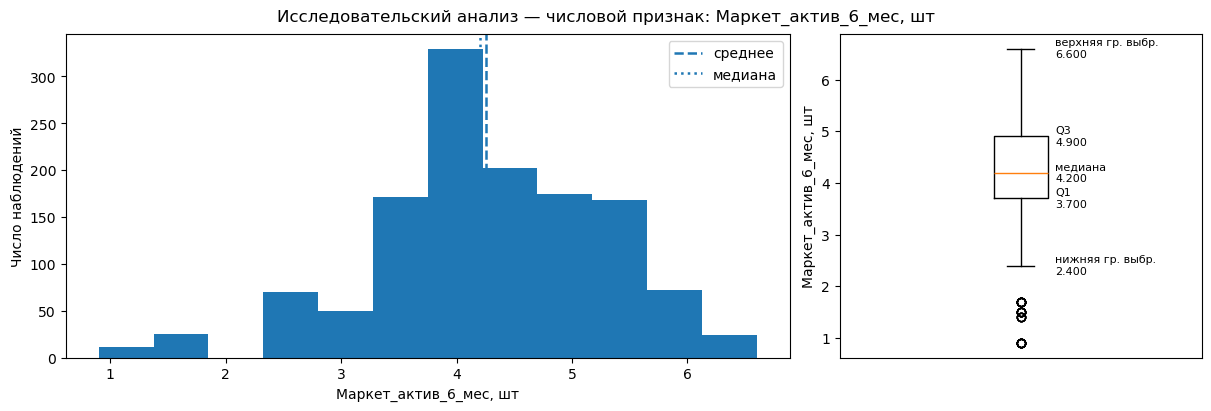

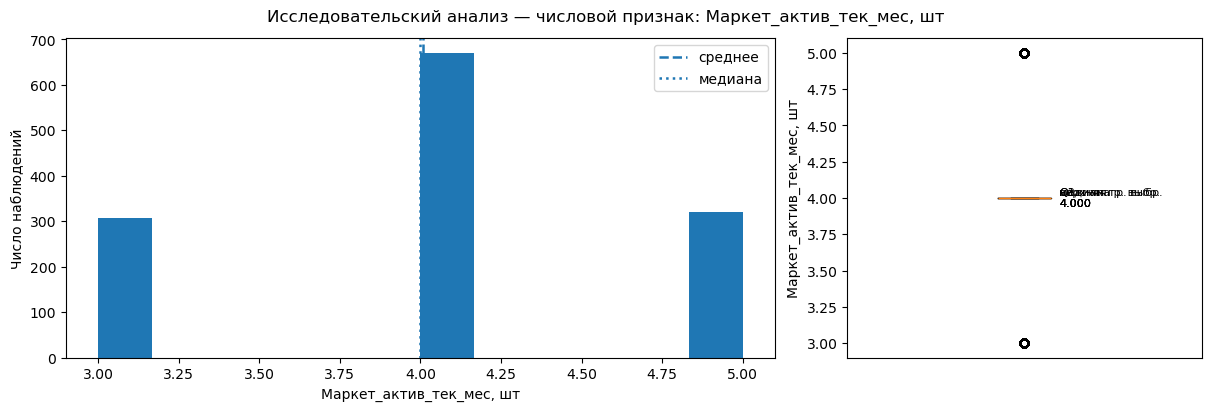

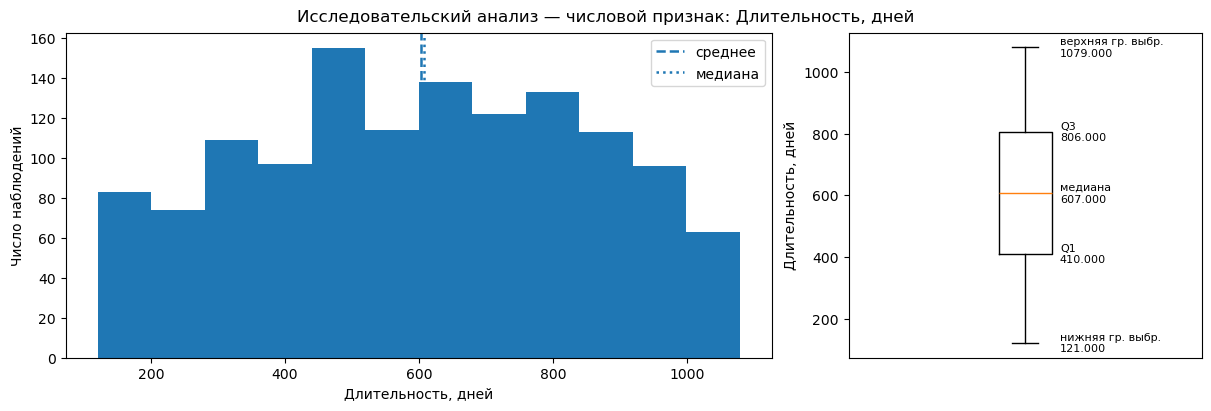

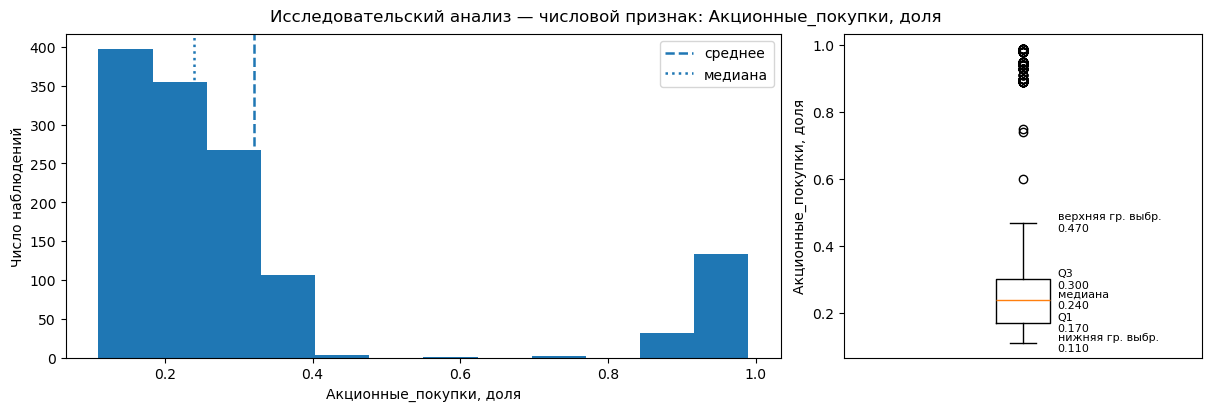

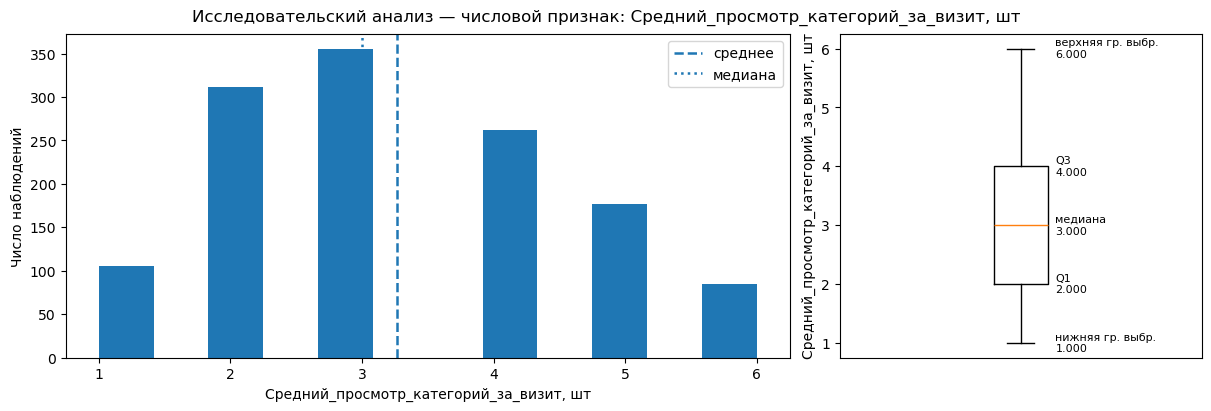

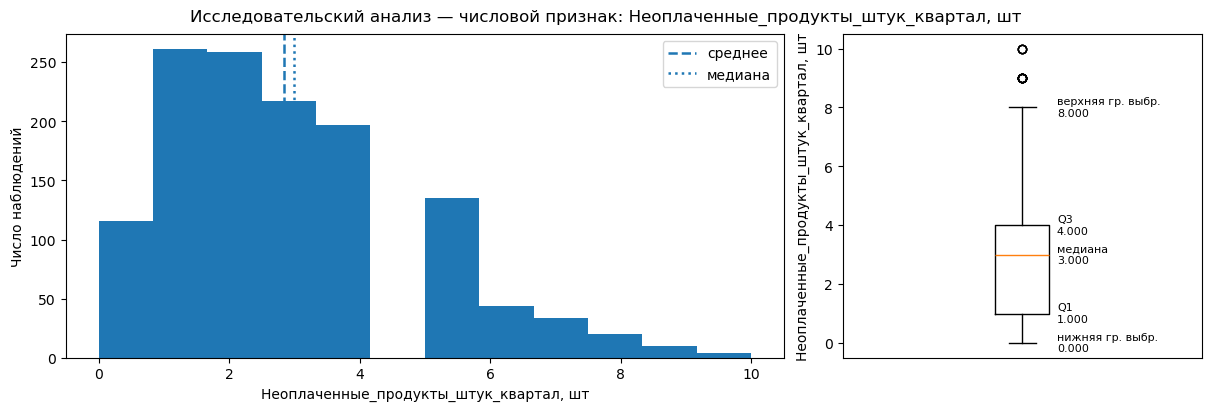

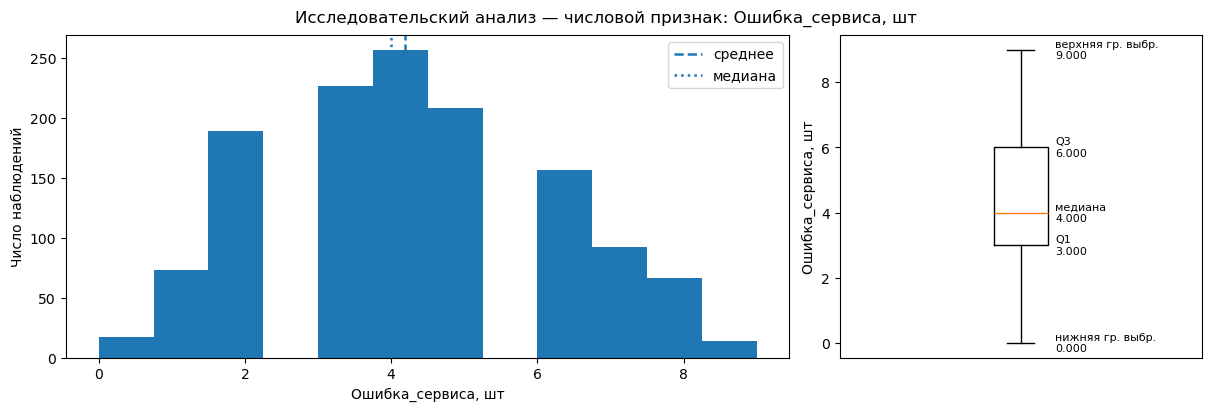

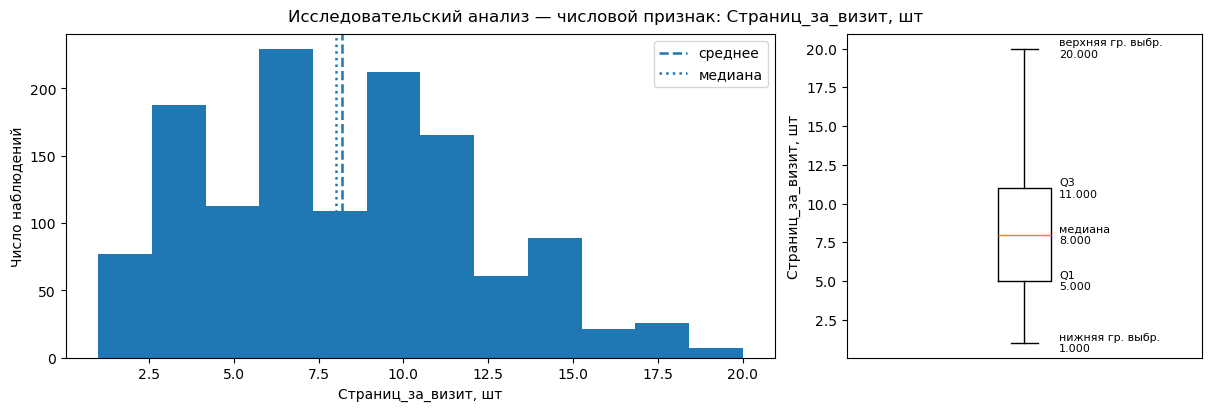

In [24]:
# Построим графики по количественным признакам с помощью созданной функции
plot_numeric_eda(mkt_file)

In [25]:
# Рассчитаем основные статистики по количественным признакам с помощью созданной функции
numeric_summary(mkt_file)

,count,missing_%,mean,median,std,min,q1,q3,max,iqr,whisk_low,whisk_high,lower_outliers_pct,upper_outliers_pct,skew,kurtosis
feature,,,,,,,,,,,,,,,,
Маркет_актив_6_мес,1297,0.0,4.254433,4.20,1.015618,0.90,3.70,4.9,6.60,1.20,2.40,6.60,2.775636,0.000000,-0.446259,0.618288
Маркет_актив_тек_мес,1297,0.0,4.009252,4.00,0.696048,3.00,4.00,4.0,5.00,0.00,4.00,4.00,23.747109,24.672321,-0.012441,-0.933355
Длительность,1297,0.0,602.993832,607.00,249.101456,121.00,410.00,806.0,1079.00,396.00,121.00,1079.00,0.000000,0.000000,-0.060746,-0.993473
Акционные_покупки,1297,0.0,0.320547,0.24,0.249657,0.11,0.17,0.3,0.99,0.13,0.11,0.47,0.000000,12.952968,1.900002,2.176097
Средний_просмотр_категорий_за_визит,1297,0.0,3.267540,3.00,1.354623,1.00,2.00,4.0,6.00,2.00,1.00,6.00,0.000000,0.000000,0.273398,-0.700690
Неоплаченные_продукты_штук_квартал,1297,0.0,2.841172,3.00,1.973451,0.00,1.00,4.0,10.00,3.00,0.00,8.00,0.000000,1.079414,0.764605,0.447333
Ошибка_сервиса,1297,0.0,4.184271,4.00,1.950973,0.00,3.00,6.0,9.00,3.00,0.00,9.00,0.000000,0.000000,0.247874,-0.516005
Страниц_за_визит,1297,0.0,8.186584,8.00,3.977061,1.00,5.00,11.0,20.00,6.00,1.00,20.00,0.000000,0.000000,0.365350,-0.530032


### Выводы по количественным признакам датафрейма `market_file`

- **Маркет_актив_6_мес**: распределение близко к нормальному, большинство клиентов в среднем получают 3–5 маркетинговых коммуникаций в месяц; выбросов практически нет.
- **Маркет_актив_тек_мес**: в распределении всего три целочисленных значения - 3, 4 и 5 - в связи с чем математически почти половина наблюдений отнесены к выбросам ниже и выше границ, которые являются одним и тем же числом - 4. Такие значения можно объяснить унифицированной маркетинговой стратегией компании.
- **Длительность**: распределение бимодальное с медианой около 600 дней; есть клиенты с долгой историей взаимодействия порядка 3-х лет; минимальный срок взаимодействия с клиентом в данных - 4 месяца.
- **Акционные_покупки**: распределение бимодальное; большинство клиентов редко покупают товары по акциям - у 75% клиентов доля акционных покупок ниже 0.3; при этом есть сегмент покупателей (порядка 13%) с высокой долей акционных покупок - определен математически как выбросы, но, по нашему мнению, точно должен остаться в данных.
- **Средний_просмотр_категорий_за_визит**: распределение бимодальное - со значениями от 1 до 6; большинство клиентов просматривают 2–4 категории товаров за визит.
- **Неоплаченные_продукты_штук_квартал**: распределение бимодальное - со значениями от 0 до 10; большинство клиентов оставляют неоплаченными 1-4 товара за квартал.
- **Ошибка_сервиса**: распределение бимодальное - со значениями от 0 до 9; у большинства клиентов во время посещения магазина возникло от 3 до 6 ошибок; медианное значение - 4; выбросов не определено
- **Страниц_за_визит**: распределение бимодальное - со значениями от 1 до 20; большинство клиентов за один визит открывают от 5 до 11 страниц; медианное значение - 8; выбросов не определено.

**Общие особенности:**  
По некоторым количественным признакам часть наблюдений математически отнесена к выбросам, но на наш взляд эти выбросы нельзя исключать из дальнейшего анализа данных и построения моделей.

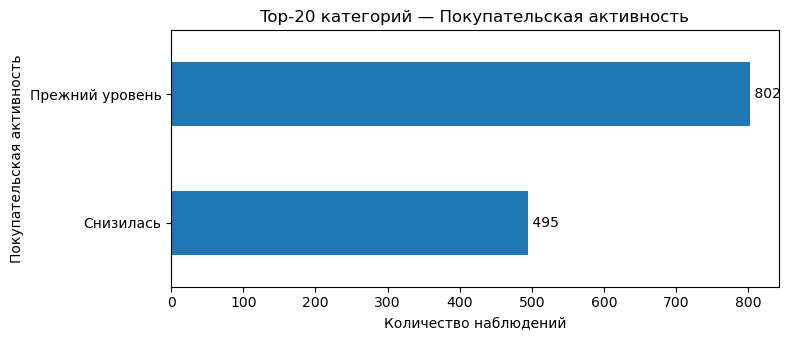

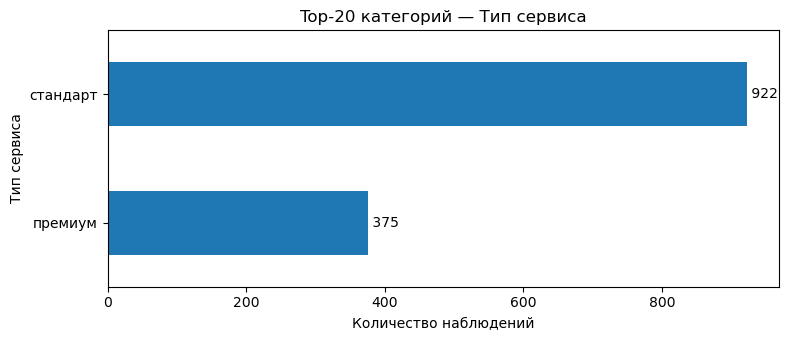

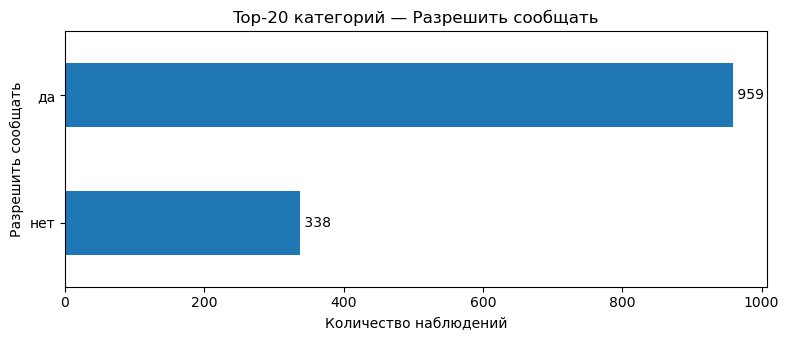

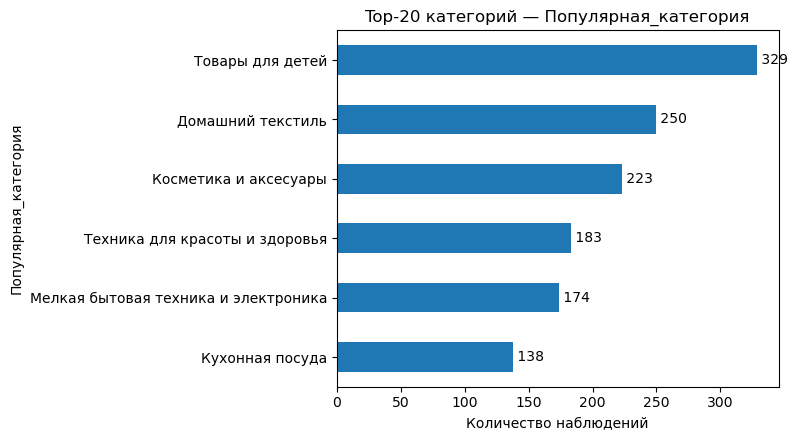

In [26]:
# Построим графики по качественным признакам с помощью созданной функции
plot_categorical_eda(mkt_file.drop(columns='id', axis=1), figsize_base=(8,3))

In [27]:
# Рассчитаем основные статистики по качественным признакам с помощью созданной функции
categorical_summary(mkt_file.drop(columns='id', axis=1))

,count,missing_%,cardinality,mode,mode_freq,entropy,max_entropy,top_1,top_2,top_3,top_4,top_5
feature,,,,,,,,,,,,
Покупательская активность,1297,0.0,2,Прежний уровень,802,0.959199,1.000000,Прежний уровень (802),Снизилась (495),NaN,NaN,NaN
Тип сервиса,1297,0.0,2,стандарт,922,0.867593,1.000000,стандарт (922),премиум (375),NaN,NaN,NaN
Разрешить сообщать,1297,0.0,2,да,959,0.827653,1.000000,да (959),нет (338),NaN,NaN,NaN
Популярная_категория,1297,0.0,6,Товары для детей,329,2.527896,2.584963,Товары для детей (329),Домашний текстиль (250),Косметика и аксесуары (223),Техника для красоты и здоровья (183),Мелкая бытовая техника и электроника (174)


### Выводы по качественным признакам датафрейма `market_file`

- **Покупательская активность**: в целевом признаке между классами наблюдается легкий дисбаланс: доля клиентов со снизившейся активностью - 38%, с уровнем прежней активности - 62%.
- **Тип сервиса**: преобладает стандартный сервис, доля премиум-клиентов значительно меньше - соотношение 70/30%.
- **Разрешить сообщать**: большинство клиентов (74%) согласились получать дополнительные предложения о товарах, но также есть значимая доля отказавшихся (26%).
- **Популярная_категория**: наиболее популярны категории «Товары для детей», «Домашний текстиль» и «Косметика и аксесуары», остальные встречаются реже.

## 3.3 Исследуем данные в датафрейме `market_money`

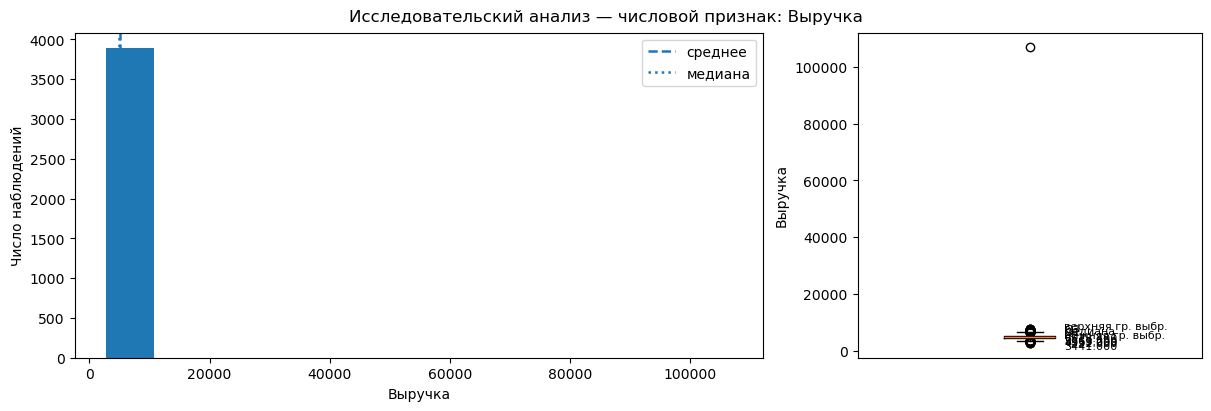

In [28]:
# Построим графики по количественным признакам с помощью созданной функции
plot_numeric_eda(mkt_money)

In [29]:
# Рассчитаем основные статистики по количественным признакам с помощью созданной функции
numeric_summary(mkt_money)

,count,missing_%,mean,median,std,min,q1,q3,max,iqr,whisk_low,whisk_high,lower_outliers_pct,upper_outliers_pct,skew,kurtosis
feature,,,,,,,,,,,,,,,,
Выручка,3891,0.0,5033.71889,4959.0,1768.471286,2758.7,4592.0,5363.2,106862.2,771.2,3441.0,6518.4,1.56772,2.775636,49.114545,2827.207812


На боксплоте видим единичный выброс, который многократно превышает верхнюю границу выбросов. Исходя из рассчитанных статистик, определим максимальную границу равную 10000 ед. и проверим, сколько значений в данных выше нее.

In [30]:
mkt_money.query('Выручка > 10000')

,id,Период,Выручка
89,215380,текущий_месяц,106862.2


Видим, что в данных всего один клиент с Выручкой более 10000 ед. Одно наблюдение не даст полезной информации моделям, которые мы планируем строить, а только будет путать их и ухудшит предсказания. Поэтому мы удалим из датафрейма данное наблюдение. 

Далее по ходу выполнения работы информация связанная с этим клиентом так же будет удалена из остальных датафреймов на этапе их объединения для подготовки к моделированию.

In [31]:
# Уберем наблюдение с аномально высоким значением выручки из дальнейшего рассмотрения
mkt_money = mkt_money.query('Выручка <= 10000')

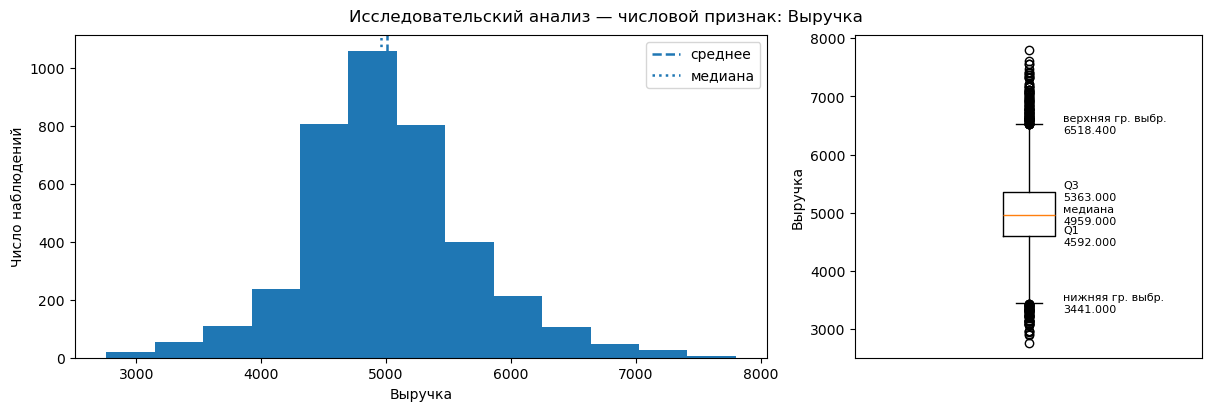

,count,missing_%,mean,median,std,min,q1,q3,max,iqr,whisk_low,whisk_high,lower_outliers_pct,upper_outliers_pct,skew,kurtosis
feature,,,,,,,,,,,,,,,,
Выручка,3890,0.0,5007.541902,4959.0,679.235737,2758.7,4592.0,5363.0,7799.4,771.0,3441.0,6518.4,1.568123,2.750643,0.360631,1.060177


In [32]:
# Заново построим графики по количественным признакам с помощью созданной функции
plot_numeric_eda(mkt_money)

# И рассчитаем основные статистики по количественным признакам с помощью созданной функции
numeric_summary(mkt_money.drop(columns='id', axis=1))

### Выводы по количественным признакам датафрейма `market_money`

- **Выручка**: распределение близко к нормальному, с небольшим смещением вправо; большинство клиентов приносят месячную Выручку в диапазоне от 4592 до 5363 ед.; выбросов суммарно порядка 4%, но они не выглядят аномально, поэтому дополнительно не будем удалять их из датафрейма.

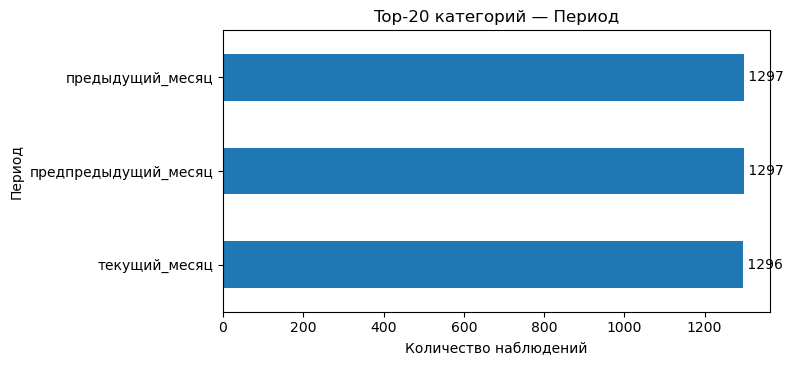

In [33]:
# Построим графики по качественным признакам с помощью созданной функции
plot_categorical_eda(mkt_money.drop(columns='id', axis=1), figsize_base=(8,3))

In [34]:
# Рассчитаем основные статистики по качественным признакам с помощью созданной функции
categorical_summary(mkt_money.drop(columns='id', axis=1))

,count,missing_%,cardinality,mode,mode_freq,entropy,max_entropy,top_1,top_2,top_3
feature,,,,,,,,,,
Период,3890,0.0,3,предпредыдущий_месяц,1297,1.584962,1.584963,предпредыдущий_месяц (1297),предыдущий_месяц (1297),текущий_месяц (1296)


### Выводы по качественным признакам датафрейма `market_money`

- **Период**: по всей видимости в датафрейме с данными о Выручке по каждому клиенту иеются данные за три последних месяца.

## 3.4 Исследуем данные в датафрейме `market_time`

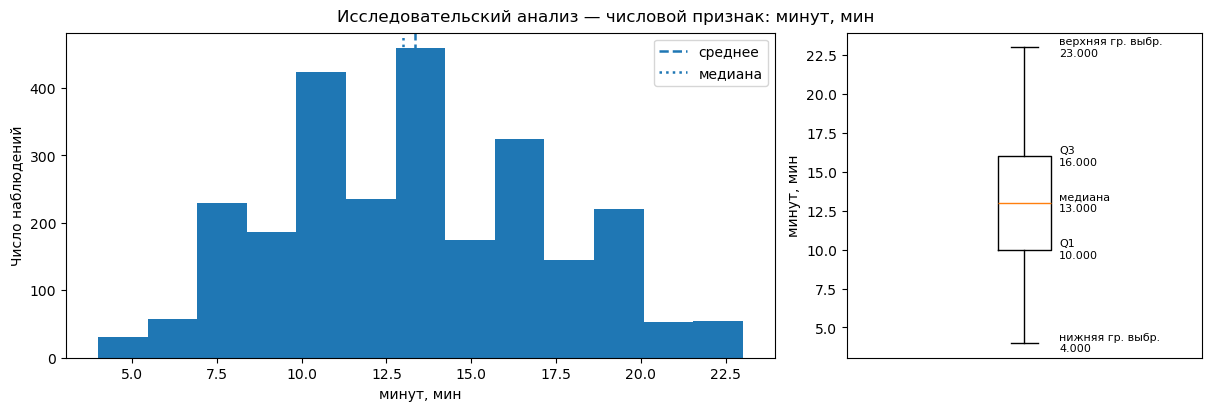

In [35]:
# Построим графики по количественным признакам с помощью созданной функции
plot_numeric_eda(mkt_time)

In [36]:
# Рассчитаем основные статистики по количественным признакам с помощью созданной функции
numeric_summary(mkt_time)

,count,missing_%,mean,median,std,min,q1,q3,max,iqr,whisk_low,whisk_high,lower_outliers_pct,upper_outliers_pct,skew,kurtosis
feature,,,,,,,,,,,,,,,,
минут,2594,0.0,13.340401,13.0,4.081999,4,10.0,16.0,23,6.0,4,23,0.0,0.0,0.154547,-0.697808


### Выводы по количественным признакам датафрейма `market_time`

- **минут**: распределение имеет несколько пиков, что может указывать на наличие групп клиентов с различным поведением. Среднее и медианное значения близки - около 13 минут, что говорит о симметричности распределения. Большинство клиентов проводят на сайте от 10 до 16 минут; минимальное значение в данных - 4 минуты, максимальное - 23 минуты. Выбросов нет.

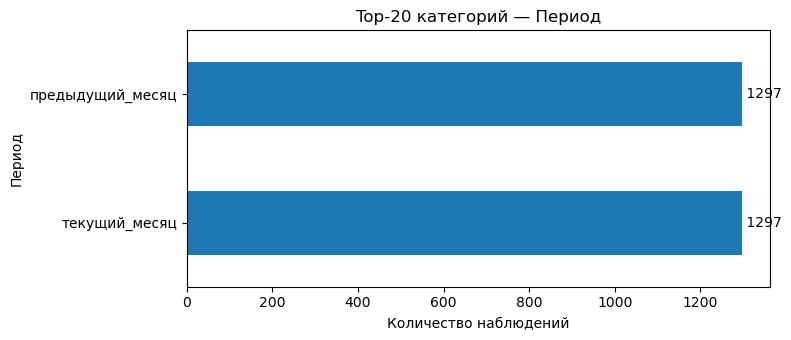

In [37]:
# Построим графики по качественным признакам с помощью созданной функции
plot_categorical_eda(mkt_time.drop(columns='id', axis=1), figsize_base=(8,3))

In [38]:
# Рассчитаем основные статистики по качественным признакам с помощью созданной функции
categorical_summary(mkt_time.drop(columns='id', axis=1))

,count,missing_%,cardinality,mode,mode_freq,entropy,max_entropy,top_1,top_2
feature,,,,,,,,,
Период,2594,0.0,2,текущий_месяц,1297,1.0,1.0,текущий_месяц (1297),предыдущий_месяц (1297)


### Выводы по качественным признакам датафрейма `market_time`

- **Период**: в отличие от данных по Выручке в датафрейме с данными о Времени на сайте по каждому клиенту иеются данные за два последних месяца.

## 3.5 Исследуем данные в датафрейме `money`

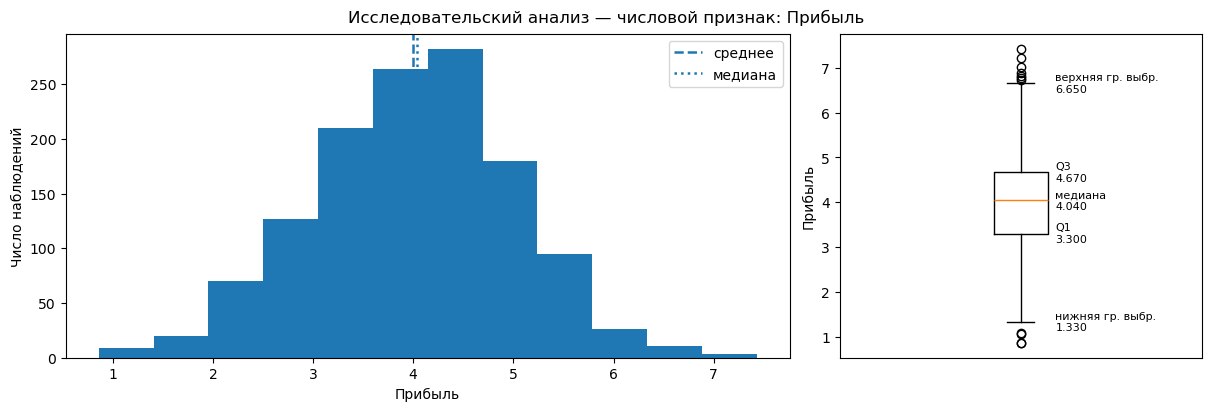

In [39]:
# Построим графики по количественным признакам с помощью созданной функции
plot_numeric_eda(money)

In [40]:
# Рассчитаем основные статистики по количественным признакам с помощью созданной функции
numeric_summary(money)

,count,missing_%,mean,median,std,min,q1,q3,max,iqr,whisk_low,whisk_high,lower_outliers_pct,upper_outliers_pct,skew,kurtosis
feature,,,,,,,,,,,,,,,,
Прибыль,1297,0.0,3.99761,4.04,1.010813,0.86,3.3,4.67,7.43,1.37,1.33,6.65,0.308404,0.539707,-0.060626,0.026854


### Выводы по количественным признакам датафрейма `money`

- **Прибыль**: распределение имеет небольшую асимметрию вправо, с хвостом высоких значений. Среднее и медианнное значения близки - 3.99 и 4.04 соответственно. Большинство клиентов приносят прибыль в диапазоне от 3.30 до 4.67. Выбросов чуть менее 1% и все они выглядят вполне реалистично в сравнении с основной массой значений, поэтому удалять их мы не будем.

Категориальных признаков в датафрейме `money` нет.

## Вывод по разделу

В ходе исследовательского анализа были подробно изучены все четыре набора данных, проведена визуализация и расчет ключевых статистик для количественных и категориальных признаков. Основные выводы:

- **market_file**: большинство клиентов получают 3–5 маркетинговых коммуникаций в месяц, преобладает стандартный сервис, большинство согласились получать сообщения с предложениями товаров. В данных есть сегмент с высокой долей акционных покупок. Дисбаланс классов целевого признака умеренный.
- **market_money**: выручка клиентов распределена близко к нормальному закону, выявлен и удалён один аномальный выброс. Большинство клиентов приносят выручку в диапазоне 4600–5400 ед. за месяц. Данные представлены за три последних месяца.
- **market_time**: среднее время на сайте — около 13 минут, распределение симметричное, выбросов нет. Данные представлены за два последних месяца.
- **money**: прибыль по клиентам также распределена равномерно, большинство клиентов приносят прибыль 3.3–4.7 ед., значимых выбросов нет.

В результате анализа были выявлены особенности распределения признаков, обнаружены и обработаны выбросы, подтверждено отсутствие пропусков и отрицательных значений количественных признаков. Полученные выводы позволят корректно подготовить данные для моделирования и учесть специфику поведения клиентов при построении моделей и сегментации.

# Шаг 4. Объединение таблиц для подготовки данных для моделирования
Объединим датафреймы `market_file`, `market_money` и `market_time` воедино для подготовки данных для дальнейшего моделирования. Данные о прибыли из датафрейма `money` на текущем этапе не объединяем, т.к. для моделировании они не понадобятся. 

Поскольку данные о выручке и времени на сайте находятся в одном столбце для всех периодов, для начала необходимо будет обработать их и разнести по отдельным столбцам - чтобы в итоговой таблице был отдельный столбец для каждого периода.

In [41]:
# Преобразуем таблицы mkt_money и mkt_time: разнесём значения по периодам в отдельные столбцы (pivot)
mkt_money_pivot = mkt_money.pivot(index='id', columns='Период', values='Выручка')
mkt_money_pivot.columns = [f'Выручка_{col}' for col in mkt_money_pivot.columns]

mkt_time_pivot = mkt_time.pivot(index='id', columns='Период', values='минут')
mkt_time_pivot.columns = [f'Время_{col}' for col in mkt_time_pivot.columns]

# При моделировании нам необходимо работать только с полной информацией о клиентах, исключая клиентов, для которых данные отсутствуют в одной или нескольких таблицах
# Поэтому объединим все таблицы по id с помощью внутреннего объединения, чтобы остались клиенты, которые отражены во всех таблицах
mkt_fin = mkt_file.set_index('id').join(mkt_money_pivot, how='inner').join(mkt_time_pivot, how='inner').reset_index()

# Помним, что мы исключили один выброс по выручке из mkt_money - в сводной таблице в значении выручки текущего месяца у клиента пустое значение
# Исключим клиентов, у которых хотя бы в одном из столбцов с выручкой есть пропуск
profit_cols = [col for col in mkt_fin.columns if col.startswith('Выручка_')]
mkt_fin = mkt_fin[mkt_fin[profit_cols].notna().all(axis=1)].reset_index(drop=True)

# Выведем информацию по итоговому датафрейму для моделирования
print(f'Размер итогового датафрейма для моделирования: {mkt_fin.shape}')
display(mkt_fin.head())
display(mkt_fin.info())

Размер итогового датафрейма для моделирования: (1296, 18)


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предпредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Время_предыдущий_месяц,Время_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   object 
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

None

Видим, что все признаки из основного и дополнительных датафреймов сохранены, пропусков в данных нет. 

## Вывод по разделу
В данном разделе были объединены три основных датафрейма (`market_file`, `market_money`, `market_time`) в единую таблицу для дальнейшего моделирования. Для этого данные о выручке и времени на сайте были преобразованы: значения по разным периодам разнесены по отдельным столбцам. Объединение выполнено по идентификатору клиента с сохранением только тех клиентов, для которых есть полная информация во всех таблицах. Также из итоговой таблицы был исключён клиент с аномально высокой выручкой, выявленный на этапе исследовательского анализа. В результате получен финальный датафрейм без пропусков и аномалий, содержащий все необходимые признаки для построения моделей машинного обучения.

# Шаг 5. Корреляционный анализ
Проведем корреляционный анализ признаков из таблицы для моделирования в количественной шкале с помощью библиотеки Phik. Проверим признаки на мультиколлинеарность и при необходимости устраним её.

Phik-корреляция — это универсальная мера ассоциации между переменными, которая подходит для любых типов признаков (категориальных и количественных) и учитывает любые (в том числе нелинейные) зависимости между ними. В отличие от коэффициента Пирсона, который измеряет только линейную связь между количественными переменными, Phik может выявлять и нелинейные, сложные взаимосвязи.

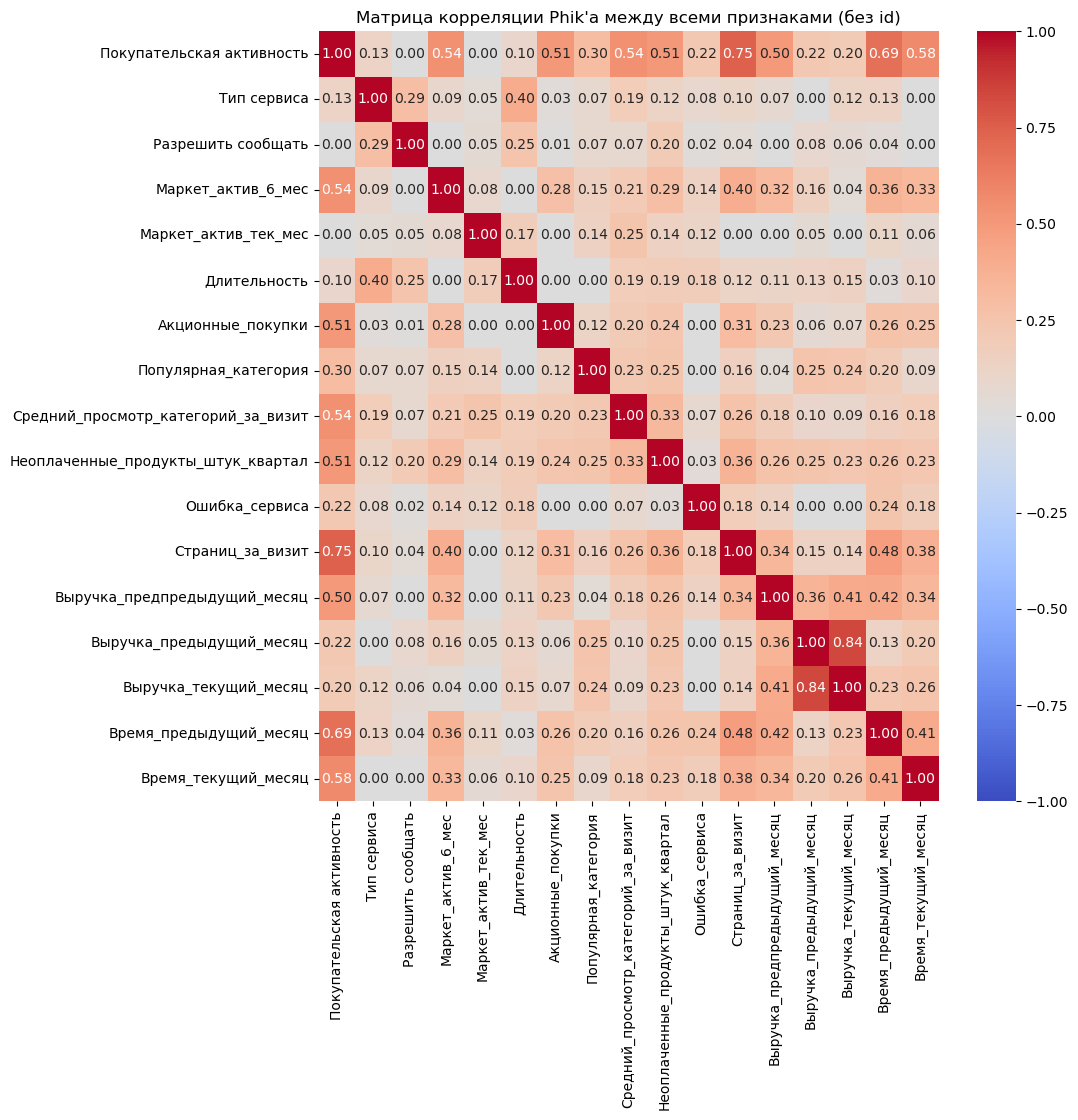

In [42]:
# Проведём корреляционный анализ всех признаков (количественных и категориальных, кроме id) с помощью phik_matrix
# Исключим только столбец с id клиента, т.к. он не является признаком, а служит для идентификации клиентов
cols_for_corr = [col for col in mkt_fin.columns if col != 'id']

# Определим количественные признаки для передачи в качестве параметра для функции построения матрицы корреляции
interval_cols = mkt_fin[cols_for_corr].select_dtypes(include=['number']).columns.tolist()

# Рассчитаем корреляционную матрицу phik
phik_corr = mkt_fin[cols_for_corr].phik_matrix(interval_cols=interval_cols)

# Визуализируем матрицу корреляций
plt.figure(figsize=(10, 10))
sns.heatmap(phik_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Матрица корреляции Phik'a между всеми признаками (без id)")
plt.show()

In [43]:
# Дополнительно выведем в виде таблицы значения корреляции всех признаков с целевым признаком "Покупательская активность"
target_corr = phik_corr['Покупательская активность'].drop('Покупательская активность').sort_values(ascending=False)
print("Корреляция признаков с целевым признаком 'Покупательская активность':")
print(target_corr)

Корреляция признаков с целевым признаком 'Покупательская активность':
Страниц_за_визит                       0.749888
Время_предыдущий_месяц                 0.685138
Время_текущий_месяц                    0.576770
Маркет_актив_6_мес                     0.544831
Средний_просмотр_категорий_за_визит    0.539607
Акционные_покупки                      0.506276
Неоплаченные_продукты_штук_квартал     0.505655
Выручка_предпредыдущий_месяц           0.497393
Популярная_категория                   0.299717
Выручка_предыдущий_месяц               0.224638
Ошибка_сервиса                         0.224154
Выручка_текущий_месяц                  0.197213
Тип сервиса                            0.129940
Длительность                           0.099901
Разрешить сообщать                     0.000000
Маркет_актив_тек_мес                   0.000000
Name: Покупательская активность, dtype: float64


In [44]:
# Посмотрим на пары признаков с высокой корреляцией
# Для этого отфильтруем матрицу корреляций, оставив только верхнюю треугольную часть (без диагонали), переведем в плоский вид таблицы и выведем 10 наиболее взаимосвязанных признаков (исключая целевой признак "Покупательская активность")
high_corr = phik_corr.where(np.triu(np.ones(phik_corr.shape), k=1).astype(bool))
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Признак 1', 'Признак 2', 'Phik-корреляция']
display(
	high_corr_pairs.query("`Признак 1` != 'Покупательская активность'")
	.sort_values(by='Phik-корреляция', ascending=False)
	.head(10)
)

,Признак 1,Признак 2,Phik-корреляция
130,Выручка_предыдущий_месяц,Выручка_текущий_месяц,0.836281
124,Страниц_за_визит,Время_предыдущий_месяц,0.478889
128,Выручка_предпредыдущий_месяц,Время_предыдущий_месяц,0.421709
135,Время_предыдущий_месяц,Время_текущий_месяц,0.410990
127,Выручка_предпредыдущий_месяц,Выручка_текущий_месяц,0.410478
19,Тип сервиса,Длительность,0.401411
52,Маркет_актив_6_мес,Страниц_за_визит,0.396769
125,Страниц_за_визит,Время_текущий_месяц,0.382377
56,Маркет_актив_6_мес,Время_предыдущий_месяц,0.363950
109,Неоплаченные_продукты_штук_квартал,Страниц_за_визит,0.363760


Видим, что между признаками `Выручка_предыдущий_месяц` и `Выручка_текущий_месяц` высокая корреляция - выше 0.8. Это может привести к мультиколлинеарности, что негативно сказывается на качестве и интерпретируемости моделей, особенно линейных (например, LogisticRegression).

Для моделирования оставим только один из сильно коррелирующих признаков, который сильнее связан с целевой переменной - `Выручка_предыдущий_месяц`. Признак `Выручка_текущий_месяц` исключим из моделирования.

Также видим несколько признаков с нулевой корреляцией Phik'a с целевым признаком - `Разрешить сообщать` и `Маркет_актив_тек_мес`. Считаем, что эти признаки можно исключить из моделирования, так как они с высокой вероятностью неинформативны для моделей.

**Таким образом, из дальнейшего моделирования исключим признаки:** 
- `Выручка_текущий_месяц`;
- `Разрешить сообщать`;
- `Маркет_актив_тек_мес`.

Мне не станем удалять их из общего датафрейма с объединенными данными `mkt_fin`, а исключим из числа признаков для обучения моделей при формировании обучающих выборок.

## Вывод по разделу
В данном разделе был проведён корреляционный анализ всех признаков датафрейма для моделирования с помощью Phik-корреляции, которая позволяет выявлять как линейные, так и нелинейные зависимости между переменными любого типа.

**Основные результаты:**
- Наиболее сильную связь с целевым признаком (`Покупательская активность`) показали количественные признаки: `Страниц_за_визит`, `Время_предыдущий_месяц`, `Время_текущий_месяц`, `Маркет_актив_6_мес`, `Средний_просмотр_категорий_за_визит`, `Акционные_покупки`, `Неоплаченные_продукты_штук_квартал` и `Выручка_предпредыдущий_месяц` - у всех этих признаком коэффициент корреляции с целевым от 0.75 до 0.5 (снижается в указанном порядке).
- Обнаружена высокая корреляция между признаками `Выручка_предыдущий_месяц` и `Выручка_текущий_месяц` (Phik > 0.8), что указывает на мультиколлинеарность. Для предотвращения её негативного влияния на модель принято решение оставить только один из этих признаков — тот, который сильнее связан с целевой переменной, - `Выручка_предыдущий_месяц`.
- Признаки `Разрешить сообщать` и `Маркет_актив_тек_мес` показали нулевую корреляцию с целевым признаком и будут исключены из набора данных для моделирования как неинформативные.
- В результате анализа были определены информативные и неколлинеарные признаки, что должно повысить качество и интерпретируемость будущих моделей.

Таким образом, проведённый корреляционный анализ позволил выявить наиболее значимые для задачи признаки, а также своевременно определить мультиколлинеарные и неинформативные признаки для дальнейшего исключения их из обучающих выборок.

# Шаг 6. Обучение моделей с использованием пайплайнов
Применим все изученные модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC() из sklearn. Для этого используем пайплайны. 

**Порядок действий:**
1. Во время подготовки данных используем ColumnTransformer. Количественные и категориальные признаки обработаем в пайплайне раздельно. Для кодирования категориальных признаков используем два кодировщика - OneHotEncoder и OrdinalEncoder, для масштабирования количественных — два скейлера - StadardScaler и MinMaxScaler. Для разных моделей подготовим данные несколькими вариантами кодирования и масштабирования.
2. Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них подберем как минимум один гиперпараметр. Выберем подходящую для задачи метрику и используем ее при подборе гиперпараметров и выборе наиболее подходящей модели для поставленной задачи.
3. Выберем лучшую модель, используя заданную метрику. Для этого применим стратегию: использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт нам лучшую модель. В качестве инструмента для подбора будем использовать GridSearchCV из sklearn, который позволяет перебирать все комбинации параметров из заданной сетки.

In [45]:
# 1. Подготовим данные для моделирования
# Запишем целевой признак и входные признаки для моделирования в переменные для удобства работы с ними и воспроизводимости
target_col = 'Покупательская активность'
# Все входные категориальные признаки являются номинальными, поэтому указываем их в одном списке (не разделяем на порядковые и номинальные)
# не включаем в списки признаки 'Разрешить сообщать', 'Выручка_текущий_месяц', 'Маркет_актив_тек_мес'
cat_feat = ['Тип сервиса', 'Популярная_категория']
num_feat = ['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
            'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка_предпредыдущий_месяц',
            'Выручка_предыдущий_месяц', 'Время_предыдущий_месяц', 'Время_текущий_месяц']

# Отделяем целевой признак от входных признаков
y = mkt_fin[target_col] # целевой признак
X = mkt_fin[num_feat + cat_feat] # входные признаки

# Разделим данные для моделирования на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE)

# Целевой признак переводим в бинарный вид для решения задачи классификации
# По алфавитному порядку: 'Прежний уровень' -> 0, 'Снизилась' -> 1 - соответствует смыслу задачи, поэтому используем LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train) # преобразуем тренировочную выборку
y_test = le.transform(y_test) # преобразуем тестовую выборку

# Выведем информацию о размерах выборок
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (972, 13)
Размер тестовой выборки: (324, 13)


In [46]:
# 2. Создадим пайплайн для подготовки данных и моделирования
# Создаём пайплайн для подготовки категориальных признаков с первоначальным заполнением пропусков и последующим OHE-кодированием
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('imputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# Создаём пайплайн для подготовки категориальных признаков с первоначальным заполнением пропусков и последующим Ordinal-кодированием
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('imputer_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ]
)

# Создаём пайплайн для подготовки количественных признаков с первоначальным заполнением пропусков и последующим масштабированием StandardScaler
# SimpleImputer + StandardScaler
num_std_pipe = Pipeline(
    [('imputer_num_std', SimpleImputer(missing_values=np.nan, strategy='median')),
     ('scaler_std', StandardScaler())
    ]
)

# Создаём пайплайн для подготовки количественных признаков с первоначальным заполнением пропусков и последующим масштабированием MinMaxScaler
# SimpleImputer + MinMaxScaler
num_minmax_pipe = Pipeline(
    [('imputer_num_minmax', SimpleImputer(missing_values=np.nan, strategy='median')),
     ('scaler_minmax', MinMaxScaler())
    ]
)

# Создаём общий пайплайн для подготовки данных
data_prep = ColumnTransformer(
    [('cat', ohe_pipe, cat_feat),
     ('num', num_std_pipe, num_feat)
    ], 
    remainder='passthrough'
)

# Создаём общий итоговый пайплайн: подготовка данных, выбор признаков, инициализация модели
pipe_final = Pipeline([
    ('preprocessor', data_prep),
    ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [ ]:
# 3. Создадим словарь с гиперпараметрами для перебора моделей с помощью GridSearchCV
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': range(2,10), # максимальная глубина дерева
        'preprocessor__num': [num_std_pipe, num_minmax_pipe, 'passthrough'],
        'preprocessor__cat': [ohe_pipe, ord_pipe]
    },
    # словарь для модели KNeighborsClassifier() 
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9, 11, 13], # количество соседей для KNN
        'preprocessor__num': [num_std_pipe, num_minmax_pipe],
        'preprocessor__cat': [ohe_pipe]
    },
    # словарь для модели LogisticRegression()
    {
        'model': [LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)],
        'model__solver': ['liblinear', 'saga'], # решатели для логистической регрессии
        'model__penalty': ['l1', 'l2'], # L1 или L2-регуляризация
        'model__C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3], # коэффициент регуляризации
        'preprocessor__num': [num_std_pipe, num_minmax_pipe],
        'preprocessor__cat': [ohe_pipe]
    },
    # словарь для модели SVC()
    {
        'model': [SVC(random_state=RANDOM_STATE, probability=True)],
        'model__C': [1e-2, 1e-1, 1, 10, 100], # коэффициент регуляризации
        'model__kernel': ['linear', 'rbf'], # тип ядра SVM
        'model__degree': [2, 3, 4, 5], # степень полинома для полиномиального ядра
        'preprocessor__num': [num_std_pipe, num_minmax_pipe],
        'preprocessor__cat': [ohe_pipe]
    }
]

**Для задачи проекта считаем наиболее подходящей метрикой - recall, поскольку:**
- В нашей задаче требуется предсказывать вероятность снижения покупательской активности клиента.
- Класс "Снизилась" (1) — это событие, которое бизнесу важно не пропустить, чтобы вовремя среагировать и удержать клиента.
- Ошибка первого рода (ложноотрицательный результат, когда модель не выявила снижение активности) для бизнеса критичнее, чем ошибка второго рода (ложноположительный результат).
- Поэтому приоритет — максимизировать полноту (recall) по классу "Снизилась", чтобы как можно больше клиентов с реальным снижением активности были обнаружены моделью.
- Метрика recall показывает долю правильно найденных объектов целевого класса среди всех реальных объектов этого класса.
- Таким образом, recall — оптимальный выбор для оценки качества модели в данной бизнес-задаче.

In [48]:
# 4. Инициализируем и запустим поиск лучшей модели с автоматическим перебором гиперпараметров с помощью GridSearchCV 
# StratifiedKFold для CV
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=CV,
    scoring='recall',  # используем метрику recall для оценки качества модели
    n_jobs=-1
)

# Запускаем GridSearchCV для поиска лучшей модели
grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)

# Предскажем значения на тестовой выборке, чтобы далее рассчитать метрику recall
y_test_pred = grid_search.predict(X_test)
print(f'Метрика recall на тестовой выборке: {recall_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Тип сервиса',
                                                   'Популярная_категория']),
                                                 ('num',
                                              

**Наиболее лучшей моделью для нашей задачи классификации (по значению метрики recall) выбрана модель LogisticRegression() с гиперпараметрами: C=0.01, max_iter=1000, penalty='l1',solver='liblinear'**

**Видим, что на тестовой выборке модель показывает результат даже немного выше, чем во время обучения: recall = 84.6%.**

In [49]:
# Выведем отчет по предсказаниям модели на основе тестовой выборки
best_model_report = classification_report(y_test, y_test_pred, target_names=['Прежний уровень', 'Снизилась'])
print('Отчет по классам на основе тестовой выборки:')
print(best_model_report)

Отчет по классам на основе тестовой выборки:
                 precision    recall  f1-score   support

Прежний уровень       0.90      0.89      0.90       201
      Снизилась       0.83      0.85      0.84       123

       accuracy                           0.87       324
      macro avg       0.86      0.87      0.87       324
   weighted avg       0.87      0.87      0.87       324



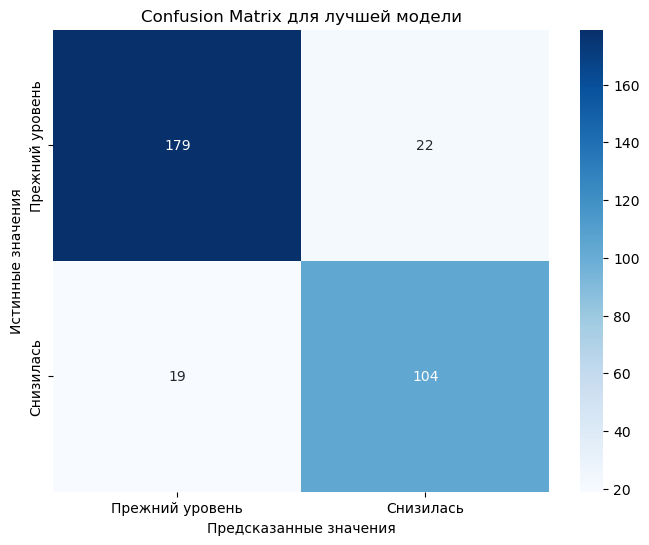

Confusion Matrix:
True Negatives (TN): 179
False Positives (FP): 22
False Negatives (FN): 19
True Positives (TP): 104

Общая точность: 0.873


In [50]:
# Дополнительно построим confusion matrix для визуализации ошибок выбранной модели
# Создаем confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Визуализируем confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Прежний уровень', 'Снизилась'],
            yticklabels=['Прежний уровень', 'Снизилась'])
plt.title('Confusion Matrix для лучшей модели')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

# Выведем числовые значения confusion matrix
print("Confusion Matrix:")
print(f"True Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")
print(f"\nОбщая точность: {(cm[0,0] + cm[1,1]) / cm.sum():.3f}")

In [51]:
# Дополнительно рассчитаем метрику roc_auc для оценки качества выбранной модели
# Предскажем значения вероятностей класса 1 на тестовой выборке, чтобы далее рассчитать метрику roc_auc
y_test_pred_proba = grid_search.predict_proba(X_test)[:, 1]
print(f'Метрика roc_auc на тестовой выборке: {roc_auc_score(y_test, y_test_pred_proba)}')

Метрика roc_auc на тестовой выборке: 0.9121870323180844


**Значение метрики roc_auc = 0.912 на тестовой выборке считается хорошим результатом для задачи бинарной классификации - такое значение свидетельствуют о высокой способности модели различать классы.**

**Поскольку показтель целевой метрики на тестовой выборке слегка выше, чем на обучении, можно сделать вывод о том, что переобучение модели отсутствует - что хорошо.**

**В связи с вышесказанным, считаем выбор модели оправданным с точки зрения выдаваемого ей результата**

In [52]:
# Дополнительно выводим результаты всех итераций поиска гиперпараметров
results_df = pd.DataFrame(grid_search.cv_results_)
# Сбросим индекс в отдельный столбец (чтобы первой строкой в выводимой таблице результатов была именно та модель которую GridSearch считает лучшей)
results_df_reset = results_df.reset_index()

# Сортируем по результату
results_df_sorted = results_df_reset.sort_values(by=['rank_test_score', 'index'], ascending=[True, True])

# Выводим первые 10 строк отсортированного датафрейма - только наиболее важные столбцы
display(results_df_sorted[['rank_test_score', 'mean_test_score','params']].head(10))  

,rank_test_score,mean_test_score,params
48,1,0.800432,"{'model': LogisticRegression(max_iter=1000, random_state=42), 'model__C': 0.01, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'preprocessor__cat': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)), 'preprocessor__num': (SimpleImputer(strategy='median'), StandardScaler())}"
163,1,0.800432,"{'model': SVC(probability=True, random_state=42), 'model__C': 100, 'model__degree': 2, 'model__kernel': 'rbf', 'preprocessor__cat': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)), 'preprocessor__num': (SimpleImputer(strategy='median'), MinMaxScaler())}"
167,1,0.800432,"{'model': SVC(probability=True, random_state=42), 'model__C': 100, 'model__degree': 3, 'model__kernel': 'rbf', 'preprocessor__cat': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)), 'preprocessor__num': (SimpleImputer(strategy='median'), MinMaxScaler())}"
171,1,0.800432,"{'model': SVC(probability=True, random_state=42), 'model__C': 100, 'model__degree': 4, 'model__kernel': 'rbf', 'preprocessor__cat': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)), 'preprocessor__num': (SimpleImputer(strategy='median'), MinMaxScaler())}"
175,1,0.800432,"{'model': SVC(probability=True, random_state=42), 'model__C': 100, 'model__degree': 5, 'model__kernel': 'rbf', 'preprocessor__cat': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)), 'preprocessor__num': (SimpleImputer(strategy='median'), MinMaxScaler())}"
162,6,0.784216,"{'model': SVC(probability=True, random_state=42), 'model__C': 100, 'model__degree': 2, 'model__kernel': 'rbf', 'preprocessor__cat': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)), 'preprocessor__num': (SimpleImputer(strategy='median'), StandardScaler())}"
166,6,0.784216,"{'model': SVC(probability=True, random_state=42), 'model__C': 100, 'model__degree': 3, 'model__kernel': 'rbf', 'preprocessor__cat': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)), 'preprocessor__num': (SimpleImputer(strategy='median'), StandardScaler())}"
170,6,0.784216,"{'model': SVC(probability=True, random_state=42), 'model__C': 100, 'model__degree': 4, 'model__kernel': 'rbf', 'preprocessor__cat': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)), 'preprocessor__num': (SimpleImputer(strategy='median'), StandardScaler())}"
174,6,0.784216,"{'model': SVC(probability=True, random_state=42), 'model__C': 100, 'model__degree': 5, 'model__kernel': 'rbf', 'preprocessor__cat': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)), 'preprocessor__num': (SimpleImputer(strategy='median'), StandardScaler())}"
44,10,0.773514,"{'model': LogisticRegression(max_iter=1000, random_state=42), 'model__C': 0.001, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'preprocessor__cat': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)), 'preprocessor__num': (SimpleImputer(strategy='median'), StandardScaler())}"


## Вывод по разделу
- В данном разделе была проведена подготовка данных и обучение нескольких моделей машинного обучения для задачи классификации снижения покупательской активности. Для подготовки данных использовались пайплайны с раздельной обработкой количественных и категориальных признаков, включая различные методы масштабирования и кодирования. Были обучены и протестированы четыре модели: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и SVC, для каждой из которых был проведён подбор гиперпараметров с помощью GridSearchCV. В качестве основной метрики выбрана recall, что соответствует бизнес-целям — минимизировать пропуск клиентов с реальным снижением активности.

- В результате перебора гиперпараметров и моделей наилучший результат показала модель LogisticRegression с регуляризацией L1 и гиперпараметрами C=0.01, penalty='l1',solver='liblinear'. Эта модель достигла значения recall на тестовой выборке 0.846, что говорит о высокой способности выявлять клиентов с пониженной активностью. Также были рассчитаны дополнительные метрики (confusion matrix, roc_auc), которые подтвердили высокое качество выбранной модели и отсутствие переобучения.

Таким образом, на этом этапе была выбрана и обучена модель, оптимальная в контексте поставленной задачи. Можем переходить к дальнейшему анализу важности признаков и сегментации клиентов.

# Шаг 7. Анализ важности признаков
## 7.1 Оценим важность признаков для выбранной оптимальной модели и построим график важности с помощью метода SHAP

Методы SHAP не работают напрямую с пайплайнами sklearn, т.к. пайплайн (sklearn.pipeline.Pipeline) — это последовательность шагов, включающая не только модель, но и этапы предобработки данных. SHAP предназначен для объяснения работы конкретной обученной модели, а не всей цепочки преобразований.

Поэтому, чтобы корректно использовать SHAP с моделью из пайплайна, нам необходимо:
- Извлечь саму модель из пайплайна
- Преобразовать данные с помощью всех шагов препроцессинга пайплайна, чтобы получить тот же формат признаков, который поступает на вход модели.
- Передать преобразованные данные и модель в SHAP-объяснитель (explainer).

In [53]:
# 1. Оценка важности признаков для лучшей модели с помощью SHAP
# Получаем лучший пайплайн и модель
best_model = grid_search.best_estimator_
preprocessor = best_model.named_steps['preprocessor']
model = best_model.named_steps['model']

# Трансформируем тестовые данные выделенным препроцессором
X_test_transformed = preprocessor.transform(X_test)

# Получаем имена признаков после препроцессинга
feature_names = preprocessor.get_feature_names_out()

# Создаём explainer для линейной модели (т.к. лучшей моделью выбрана Logistic regression)
explainer = shap.LinearExplainer(model, masker=shap.maskers.Independent(X_test_transformed), feature_names=feature_names) 
# Значение 'Independent' в параметрах определения explainer — это маскирование признаков случайными независимыми значениями из данных,
# т.к. на этапе анализа мы удалили из признаков мультиколлинеарные признаки, и теперь среди признаков нет сильно зависимых друг от друга.

# Вычисляем SHAP-значения для тестовых данных
shap_values = explainer(X_test_transformed)

### SHAP: Точечный график важности признаков
p.s. добавить подпись на сам график SHAP у меня так и не получилось.

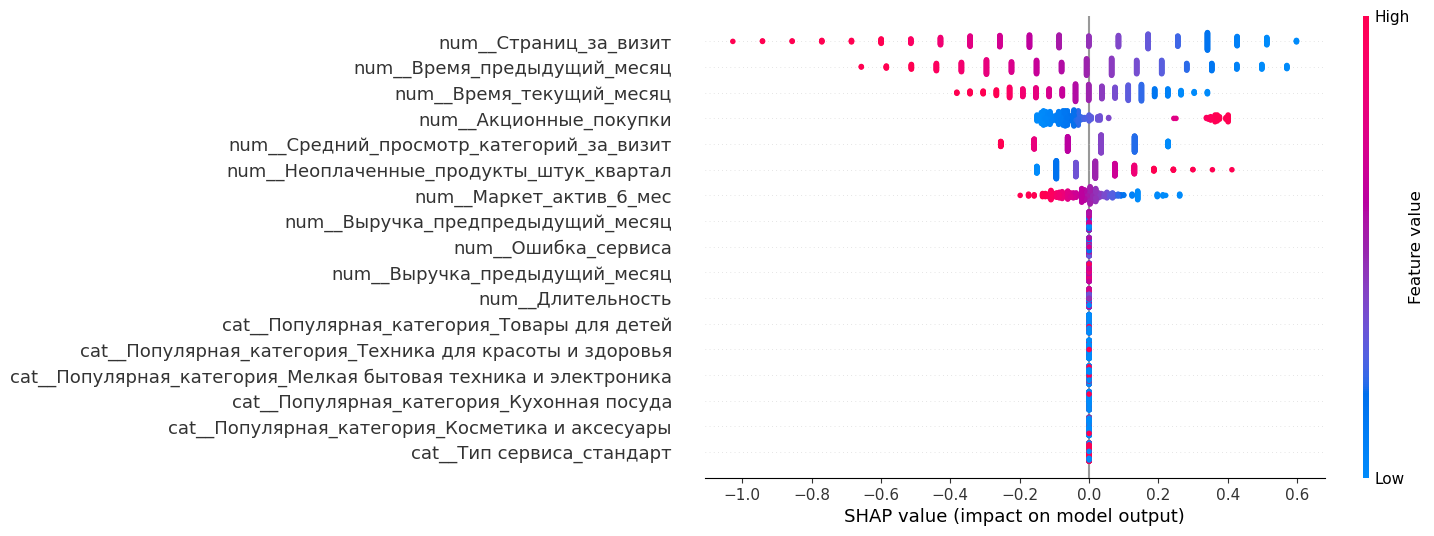

<Figure size 640x480 with 0 Axes>

In [54]:
# Построим точечный (beeswarm) и столбчатый (bar) графики важности признаков по SHAP
# Точечный график (beeswarm)
fig, ax = plt.subplots(figsize=(10, 6))
shap.plots.beeswarm(shap_values, max_display=20, ax=ax, plot_size=None)
fig.suptitle('SHAP: Точечный график важности признаков', fontsize=14)
plt.tight_layout()
plt.show()

### SHAP: Столбчатый график важности признаков

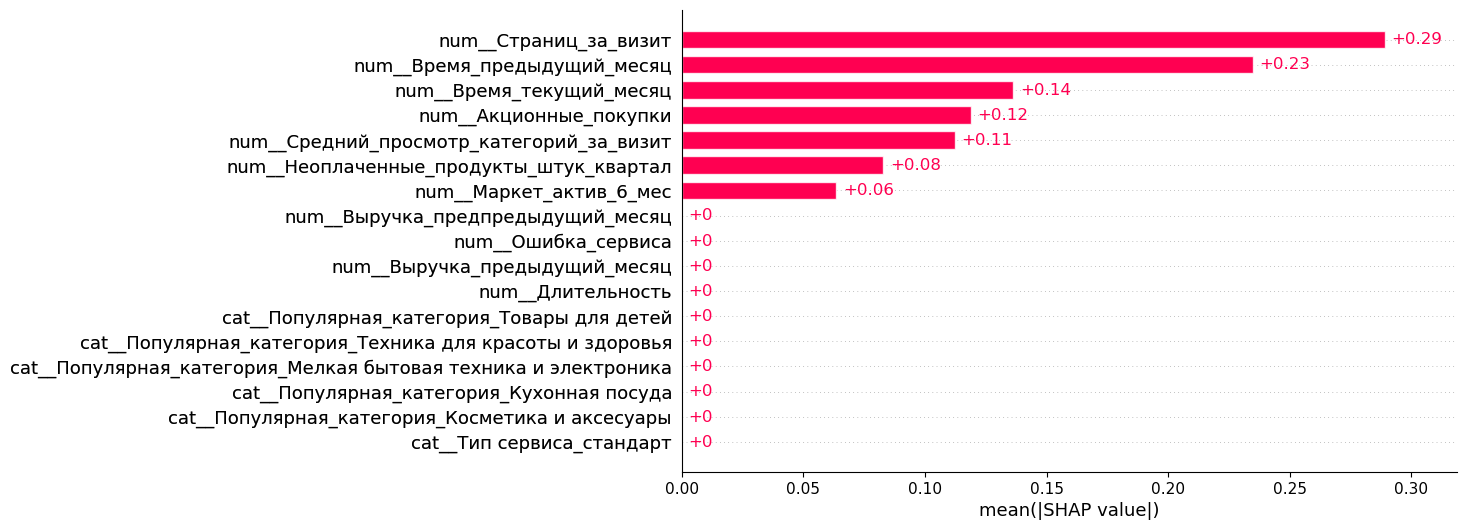

<Figure size 640x480 with 0 Axes>

In [55]:
# Столбчатый график (bar)
fig, ax = plt.subplots(figsize=(10, 6))
shap.plots.bar(shap_values, max_display=20, ax=ax)
fig.suptitle('SHAP: Столбчатый график важности признаков', fontsize=14)
plt.tight_layout()
plt.show()

In [56]:
# Дополнительно выведем таблицу с SHAP-значениями для каждого признака для большей наглядности
# Получим средние абсолютные значения SHAP для каждого признака и преобразуем в датафрейм
shap_importance = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': np.abs(shap_values.values).mean(axis=0)
}).sort_values('mean_abs_shap', ascending=False)

print("Наиболее значимые признаки для модели — вверху таблицы. Мало значимые — внизу.")
display(shap_importance)

Наиболее значимые признаки для модели — вверху таблицы. Мало значимые — внизу.


,feature,mean_abs_shap
12,num__Страниц_за_визит,0.288973
15,num__Время_предыдущий_месяц,0.234824
16,num__Время_текущий_месяц,0.136382
8,num__Акционные_покупки,0.118736
9,num__Средний_просмотр_категорий_за_визит,0.112389
10,num__Неоплаченные_продукты_штук_квартал,0.082802
6,num__Маркет_актив_6_мес,0.063576
4,cat__Популярная_категория_Техника для красоты и здоровья,0.000000
5,cat__Популярная_категория_Товары для детей,0.000000
7,num__Длительность,0.000000


## 7.2 Проанализируем значимость признаков для модели и сделаем выводы:
- какие признаки сильнее всего влияют на целевой признак;
- какие признаки мало значимы для модели;
- как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

## Вывод по разделу. Анализ значимости признаков для модели на основе SHAP-графиков и таблицы SHAP-значений
1. Наиболее значимые признаки для модели (по SHAP bar/beeswarm):
- Самый важный признак: `Страниц_за_визит` 
- Далее по убыванию: `Время_предыдущий_месяц`, `Время_текущий_месяц`, `Акционные_покупки`, `Средний_просмотр_категорий_за_визит`, `Неоплаченные_продукты_штук_квартал`, `Маркет_актив_6_мес`.

2. Как значения признаков влияют на определение категории (по beeswarm):
- `Страниц_за_визит`: высокие значения (красные точки слева) снижают вероятность понижения активности (класс 1), низкие значения (синие точки справа) — наоборот, повышают вероятность, что активность клиента снизится.
- `Время_предыдущий_месяц`: чем больше времени клиент проводил на сайте, тем ниже вероятность снижения активности, и наоборот, меньшие значения времени на сайте за предыдущий месяц приводят к снижению покупательской активности.
- `Время_текущий_месяц`: аналогично — увеличение времени уменьшает вероятность снижения покупательской активности.
- `Акционные_покупки`: высокая доля акционных покупок увеличивает вероятность снижения активности (возможно, клиенты реагируют только на акции).
- `Средний_просмотр_категорий_за_визит`: больше категорий за визит — ниже вероятность снижения активности, и наоборот.
- `Неоплаченные_продукты_штук_квартал`: больше неоплаченных товаров — выше риск снижения активности.
- `Маркет_актив_6_мес`: больше маркетинговых коммуникаций за последние полгода — ниже вероятность снижения активности, и наоборот, низкие значения маркетинговой активности способствуют снижению активности клиентов.

3. Мало значимые признаки (SHAP ≈ 0):
- Категориальные признаки: `Тип сервиса`, `Популярная_категория` (все варианты);
- Количественные признаки: `Длительность`, `Ошибка_сервиса`, `Выручка_предпредыдущий_месяц`, `Выручка_предыдущий_месяц` — их вклад в предсказания выбранной модели практически отсутствует.

4. Как использовать эти наблюдения:
- Для моделирования: можно упростить модель, исключив малозначимые признаки — это ускорит обучение и повысит интерпретируемость модели.
- Для бизнеса: 
     - Фокус на клиентов с низким числом просмотренных страниц, малым временем на сайте, высокой долей акционных покупок и большим числом неоплаченных товаров — это "группа риска" по снижению покупательской активности.
     - Пересмотреть маркетинговые коммуникации: их недостаток может приводить к оттоку клиентов.
     - Категориальные признаки и история выручки не дают дополнительной информации для выявления снижения активности — можно не использовать их для таргетирования.

**Итог: модель опирается на поведенческие количественные признаки, а не на категориальные или финансовые. Для предотвращения снижения активности стоит работать с поведением клиентов на сайте и маркетингом.**

# Шаг 8. Сегментация покупателей
## 8.1 Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей (датафрейм `money`) 
Выделим следующие сегменты (группы клиентов):
1. высокая вероятность снижения покупательской активности и высокая прибыльность - границы для сегментов определим графически. 
2. высокая вероятность снижения покупательской активности и максимальная доля покупок по акции - границы для сегментов определим графически.
3. наиболеее популярная категория покупок - Мелкая бытовая техника и электроника, то есть товары с длинным жизненным циклом.

### Перед выполнением сегментации проверим работу составленной модели на полном датафрейме - сравним точность предсказаний в сравнении с изначально известными классами.

In [57]:
# Добавим предсказания модели в итоговый датафрейм для анализа сегментов
mkt_fin['Покупательская активность_pred'] = best_model.predict(mkt_fin[num_feat + cat_feat])
# Переведем предсказанные значения целевого признака в исходный категориальный тип для наглядности
mkt_fin['Покупательская активность_pred'] = le.inverse_transform(mkt_fin['Покупательская активность_pred'])

# Выведем распределение предсказанных значений целевого признака на всем датафрейме
print("Распределение предсказанных значений целевого признака на всем датафрейме:")
print(mkt_fin['Покупательская активность_pred'].value_counts(dropna=False))
# Выведем распределение предсказанных значений целевого признака только для клиентов, у которых покупательская активность действительно снизилась
print("Распределение предсказанных значений целевого признака для клиентов, у которых покупательская активность действительно снизилась:")
print(mkt_fin[mkt_fin['Покупательская активность'] == "Снизилась"]['Покупательская активность_pred'].value_counts(dropna=False))

Распределение предсказанных значений целевого признака на всем датафрейме:
Покупательская активность_pred
Прежний уровень    788
Снизилась          508
Name: count, dtype: int64
Распределение предсказанных значений целевого признака для клиентов, у которых покупательская активность действительно снизилась:
Покупательская активность_pred
Снизилась          402
Прежний уровень     92
Name: count, dtype: int64


**Таким образом, при предсказании классов по стандартной границе вероятности равной 0.5 метрика охвата на всем датафрейме составила 0.814 (92/494); метрика точности предсказаний - 0.791 (106 ошибок/508).**

### Теперь добавим необходимые для сегментации покупателей признаки - предсказанную моделью вероятность отнесения клиента к классу 1 (Снижение покупательской активности) и данные среднемесячной прибыли компании от клиента за 3 последние месяца

In [58]:
# Добавим предсказания модели вероятности отнесения клиента к классу 1 (Снижение покупательской активности) в итоговый датафрейм для анализа сегментов
mkt_fin['Покупательская активность_pred_proba'] = best_model.predict_proba(mkt_fin[num_feat + cat_feat])[:, 1]

In [59]:
# Добавим в общий датафрейм информацию о среднемесячной прибыли от клиентов за последние 3 месяца
# Для этого объединим датафреймы mkt_fin и money по id клиентов
mkt_fin = mkt_fin.merge(money, on='id', how='left')
# Переименуем столбец с прибылью для удобства
mkt_fin.rename(columns={'Прибыль': 'Средняя_прибыль_3_месяца'}, inplace=True)
# Выведем информацию о итоговом датафрейме для анализа сегментов
print(f'Информация по итоговому датафрейму для анализа сегментов:')
display(mkt_fin.head())
display(mkt_fin.info())

Информация по итоговому датафрейму для анализа сегментов:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предпредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Время_предыдущий_месяц,Время_текущий_месяц,Покупательская активность_pred,Покупательская активность_pred_proba,Средняя_прибыль_3_месяца
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10,Снизилась,0.669525,4.16
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13,Снизилась,0.562065,3.13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13,Снизилась,0.662684,4.87
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11,Снизилась,0.778947,4.21
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10,Снизилась,0.633934,3.95


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    1296 non-null   object 
 1   Покупательская активность             1296 non-null   object 
 2   Тип сервиса                           1296 non-null   object 
 3   Разрешить сообщать                    1296 non-null   object 
 4   Маркет_актив_6_мес                    1296 non-null   float64
 5   Маркет_актив_тек_мес                  1296 non-null   int64  
 6   Длительность                          1296 non-null   int64  
 7   Акционные_покупки                     1296 non-null   float64
 8   Популярная_категория                  1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит   1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал    1296 non-null   int64  
 11  Ошибка_сервиса   

None

### Сегмент 1 - высокая вероятность снижения покупательской активности и высокая прибыльность

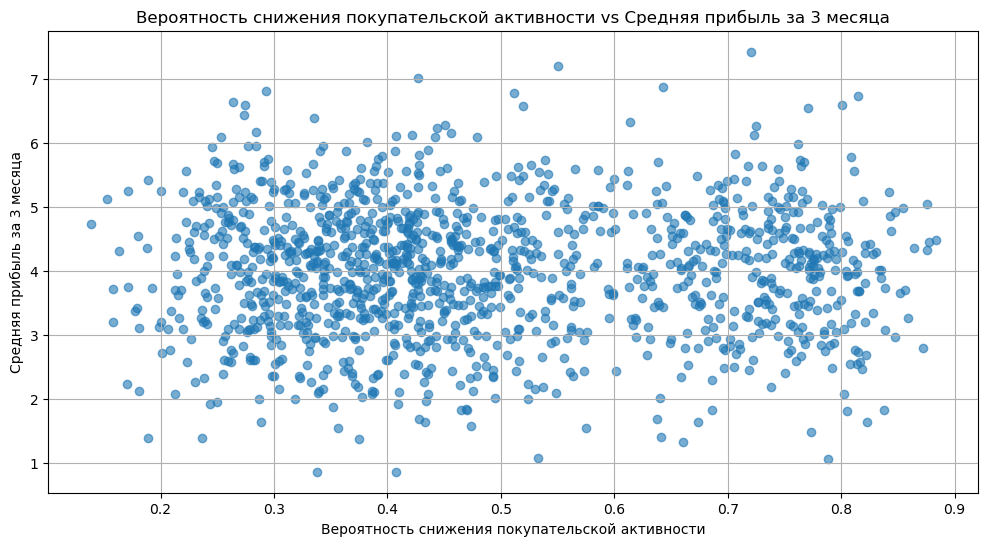

In [60]:
# Построим скаттерплот для определения границ для первого сегмента: вероятность снижения покупательской активности (x) vs средняя прибыль за 3 месяца (y)
plt.figure(figsize=(12, 6))
plt.scatter(
    mkt_fin['Покупательская активность_pred_proba'],
    mkt_fin['Средняя_прибыль_3_месяца'],
    alpha=0.6
)
plt.xlabel('Вероятность снижения покупательской активности')
plt.ylabel('Средняя прибыль за 3 месяца')
plt.title('Вероятность снижения покупательской активности vs Средняя прибыль за 3 месяца')
plt.grid(True)
plt.show()

**По нашему мнению в качестве границ для данного сегмента подходят:**
- вероятность снижения покупательской активности >= 0.6
- средняя прибыль >= 3

In [61]:
# Выделяем сегмент 1
# Зафиксируем пороговые значения для сегмента 1
segment_1_predict_proba = 0.6
segment_1_profit = 3
# Создадим новый столбец в датафрейме mkt_fin для сегмента 1
mkt_fin['segment_high_risk_high_profit'] = (
    (mkt_fin['Покупательская активность_pred_proba'] >= segment_1_predict_proba) &
    (mkt_fin['Средняя_прибыль_3_месяца'] >= segment_1_profit)
)

# Проверим количество клиентов в сегменте
print("Клиентов в Сегменте 1 (high risk & high profit):", mkt_fin['segment_high_risk_high_profit'].sum())

Клиентов в Сегменте 1 (high risk & high profit): 311


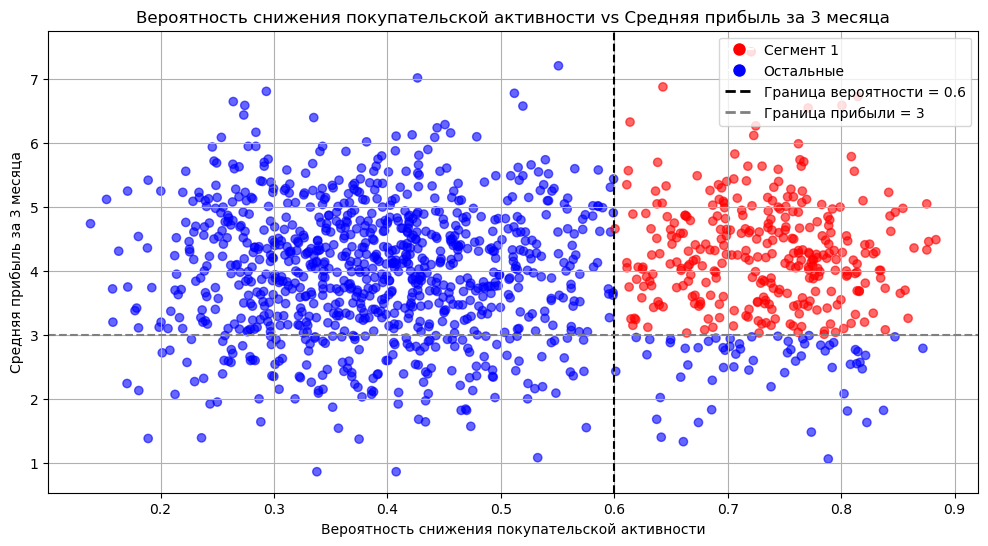

In [62]:
# Построим скаттерплот заново но теперь с выбранными границами сегмента 1 и цветовой маркировкой точек
plt.figure(figsize=(12, 6))
colors = mkt_fin['segment_high_risk_high_profit'].map({True: 'red', False: 'blue'})
plt.scatter(
    mkt_fin['Покупательская активность_pred_proba'],
    mkt_fin['Средняя_прибыль_3_месяца'],
    c=colors,
    alpha=0.6,
    label=None
)
# Вертикальная линия — граница вероятности
plt.axvline(segment_1_predict_proba, color='black', linestyle='--', label=f'Граница вероятности = {segment_1_predict_proba}')
# Горизонтальная линия — граница прибыли
plt.axhline(segment_1_profit, color='grey', linestyle='--', label=f'Граница прибыли = {segment_1_profit}')
plt.xlabel('Вероятность снижения покупательской активности')
plt.ylabel('Средняя прибыль за 3 месяца')
plt.title('Вероятность снижения покупательской активности vs Средняя прибыль за 3 месяца')
plt.grid(True)
# Добавим легенду для сегмента
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Сегмент 1', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Остальные', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label=f'Граница вероятности = {segment_1_predict_proba}'),
    Line2D([0], [0], color='grey', lw=2, linestyle='--', label=f'Граница прибыли = {segment_1_profit}')
]
plt.legend(handles=legend_elements)
plt.show()

### Сегмент 2 - высокая вероятность снижения покупательской активности и максимальная доля покупок по акции

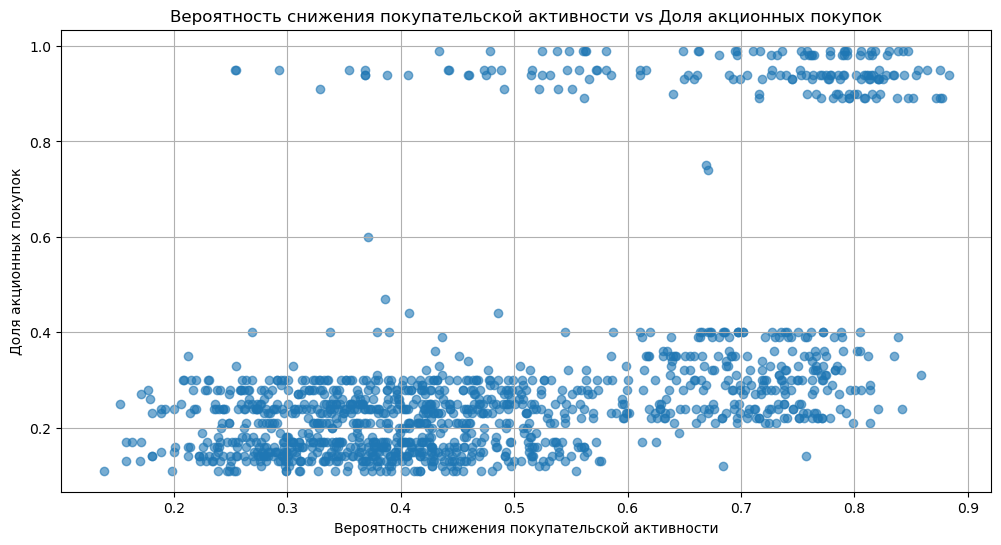

In [63]:
# Построим скаттерплот для определения границ для второго сегмента: вероятность снижения покупательской активности (x) vs доля акционных покупок (y)
plt.figure(figsize=(12, 6))
plt.scatter(
    mkt_fin['Покупательская активность_pred_proba'],
    mkt_fin['Акционные_покупки'],
    alpha=0.6
)
plt.xlabel('Вероятность снижения покупательской активности')
plt.ylabel('Доля акционных покупок')
plt.title('Вероятность снижения покупательской активности vs Доля акционных покупок')
plt.grid(True)
plt.show()

**По нашему мнению в качестве границ для данного сегмента подходят:**
- вероятность снижения покупательской активности >= 0.6
- доля покупок по акции >= 0.8

In [64]:
# Зафиксируем пороговые значения для сегмента 2
segment_2_predict_proba = 0.6
segment_2_promo = 0.8
# Создадим новый столбец в датафрейме mkt_fin для сегмента 2
mkt_fin['segment_high_risk_high_promo'] = (
    (mkt_fin['Покупательская активность_pred_proba'] >= segment_2_predict_proba) &
    (mkt_fin['Акционные_покупки'] >= segment_2_promo)
)

# Проверим количество клиентов в сегменте
print("Клиентов в Сегменте 2 (high risk & high promo):", mkt_fin['segment_high_risk_high_promo'].sum())

Клиентов в Сегменте 2 (high risk & high promo): 121


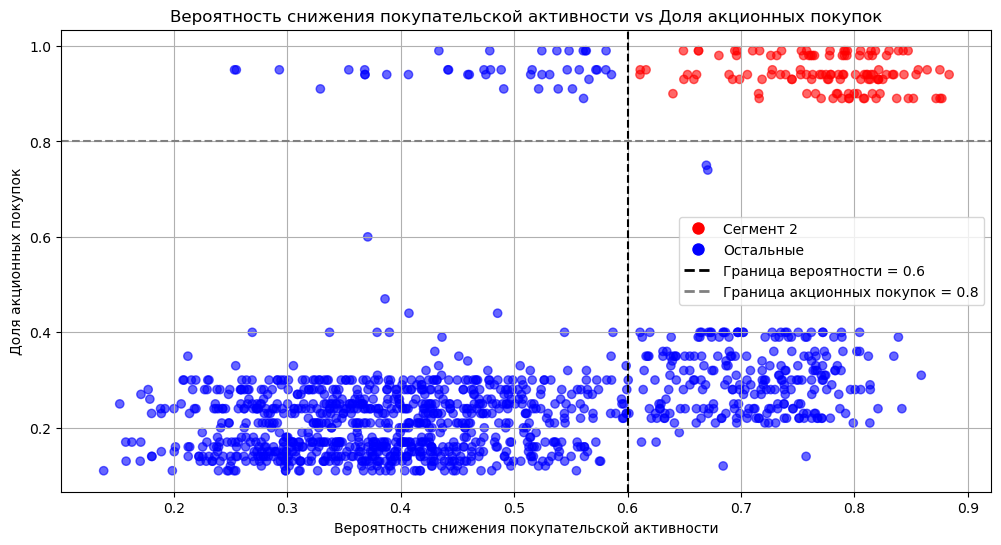

In [65]:
# Построим скаттерплот заново, но теперь с выбранными границами сегмента 2 и цветовой маркировкой точек
plt.figure(figsize=(12, 6))
colors = mkt_fin['segment_high_risk_high_promo'].map({True: 'red', False: 'blue'})
plt.scatter(
    mkt_fin['Покупательская активность_pred_proba'],
    mkt_fin['Акционные_покупки'],
    c=colors,
    alpha=0.6,
    label=None
)
# Вертикальная линия — граница вероятности
plt.axvline(segment_2_predict_proba, color='black', linestyle='--', label=f'Граница вероятности = {segment_2_predict_proba}')
# Горизонтальная линия — граница доли акционных покупок
plt.axhline(segment_2_promo, color='grey', linestyle='--', label=f'Граница акционных покупок = {segment_2_promo}')
plt.xlabel('Вероятность снижения покупательской активности')
plt.ylabel('Доля акционных покупок')
plt.title('Вероятность снижения покупательской активности vs Доля акционных покупок')
plt.grid(True)
# Добавим легенду для сегмента
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Сегмент 2', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Остальные', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label=f'Граница вероятности = {segment_2_predict_proba}'),
    Line2D([0], [0], color='grey', lw=2, linestyle='--', label=f'Граница акционных покупок = {segment_2_promo}')
]
plt.legend(handles=legend_elements)
plt.show()

### Сегмент 3 - наиболеее популярная категория покупок - Мелкая бытовая техника и электроника (товары с длинным жизненным циклом)

Для определения границ данного сегмента не требуется строить дополнительные графики - мы определеяем его по категории наиболее частых покупок.

In [66]:
# Выделяем сегмент 3
tech_categories = ['Мелкая бытовая техника и электроника']
mkt_fin['segment_only_tech'] = mkt_fin['Популярная_категория'].isin(tech_categories)

# Проверим количество клиентов в сегменте
print("Клиентов в Сегменте 3 (only tech):", mkt_fin['segment_only_tech'].sum())

Клиентов в Сегменте 3 (only tech): 174


После выделения сегмента в основном датафрейме построим скаттерплот по признакам, которые использовали для сегментации первых двух - Средняя прибыль и доля акционных покупок, чтобы посмотреть, есть ли отличия от остальных клиентов.

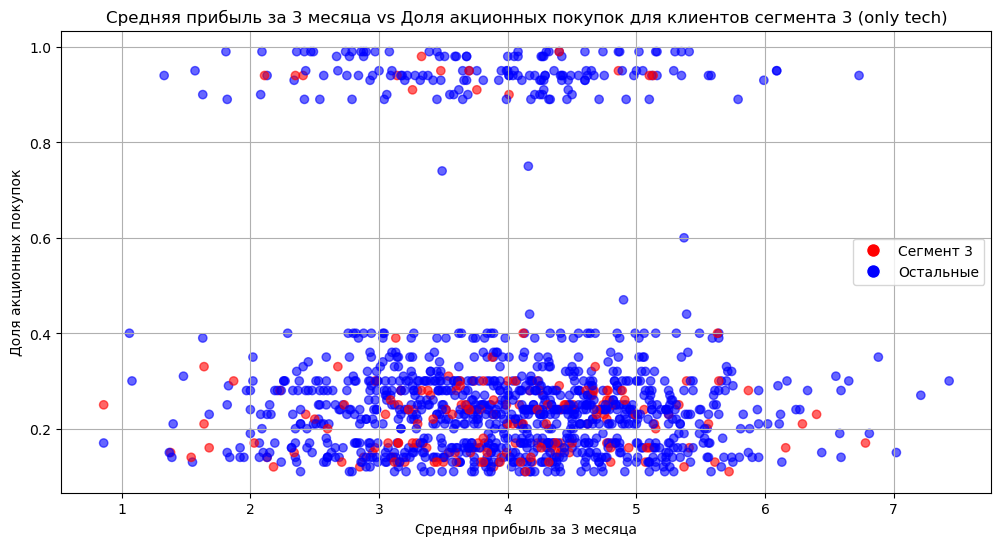

In [67]:
# Построим скаттерплот для сегмента 3 и цветовой маркировкой точек
plt.figure(figsize=(12, 6))
colors = mkt_fin['segment_only_tech'].map({True: 'red', False: 'blue'})
plt.scatter(
    mkt_fin['Средняя_прибыль_3_месяца'],
    mkt_fin['Акционные_покупки'],
    c=colors,
    alpha=0.6,
    label=None
)
plt.xlabel('Средняя прибыль за 3 месяца')
plt.ylabel('Доля акционных покупок')
plt.title('Средняя прибыль за 3 месяца vs Доля акционных покупок для клиентов сегмента 3 (only tech)')
plt.grid(True)
# Добавим легенду для сегмента
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Сегмент 3', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Остальные', markerfacecolor='blue', markersize=10)
]
plt.legend(handles=legend_elements)
plt.show()

По данным двум признакам особенных различий между клиентами сегмента 3 и остальными клиентами не наблюдается.

**Более подробное изучение различий между определенными сегментами рассмотрим далее.**

## 8.2 Проанализируем сегменты покупателей, предложим, как увеличить их покупательскую активность: 
- Проведем графическое и аналитическое исследование выделенных групп покупателей.
- Сделаем предложения по работе с сегментом для увеличения покупательской активности.

In [68]:
# Запишем список признаков, которые оказались наиболее важными для предсказаний модели и \
# которые считаем важными для анализа сегментов (+средняя прибыль за 3 месяца)
important_features = [
    'Страниц_за_визит',
    'Время_предыдущий_месяц',
    'Время_текущий_месяц',
    'Акционные_покупки',
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал',
    'Маркет_актив_6_мес',
    'Средняя_прибыль_3_месяца'
]

### Сегмент 1 - высокая вероятность снижения покупательской активности и высокая прибыльность

Аналитика по Сегменту 1: 311 клиентов (high risk & high profit)


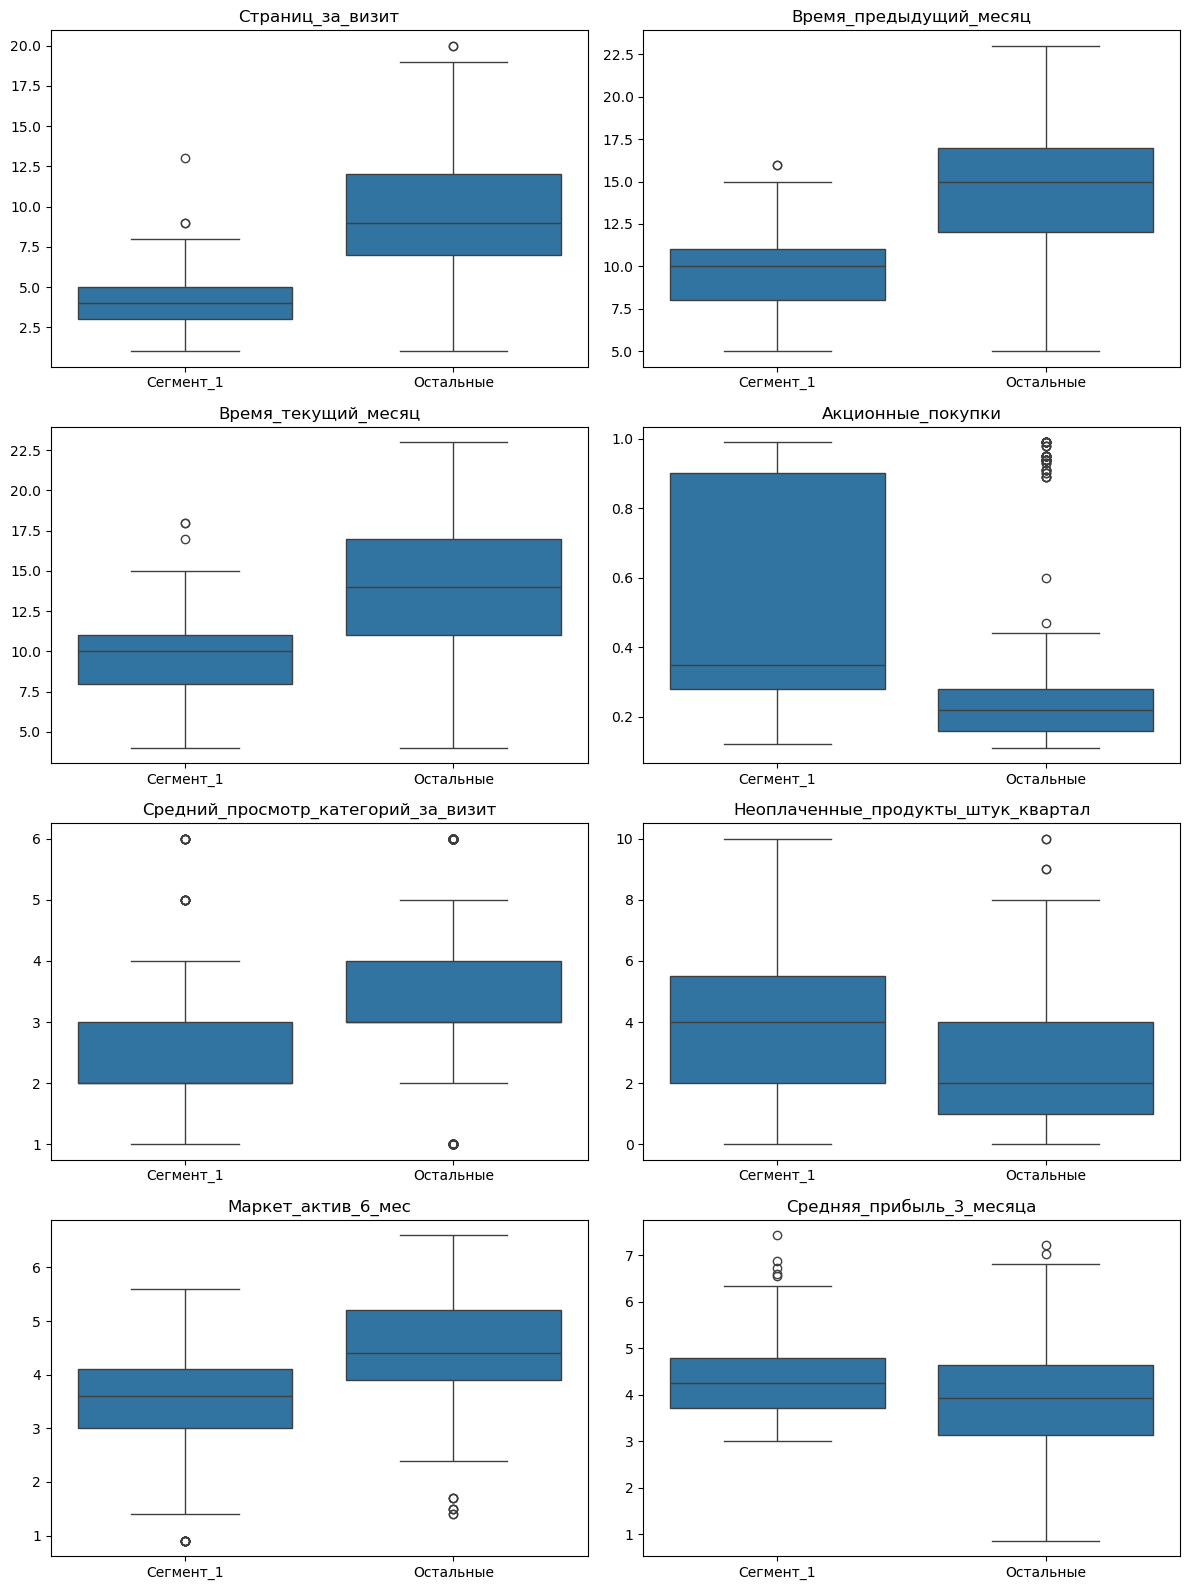

In [69]:
# Построим боксплоты по выбранным признакам для Cегмента 1 (клиентов с высокой вероятностью снижения активности и высокой прибылью)
# Вспомогательные переменные для построения графиков
n = len(important_features)
ncols = 2
nrows = (n + 1) // ncols
# Создадим маску для сегмента 1
segment_mask_1 = mkt_fin['segment_high_risk_high_profit']

print(f"Аналитика по Сегменту 1: {segment_mask_1.sum()} клиентов (high risk & high profit)")

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

for i, feature in enumerate(important_features):
    sns.boxplot(
        data=mkt_fin,
        x=segment_mask_1.map({True: 'Сегмент_1', False: 'Остальные'}),
        y=feature,
        ax=axes[i]
    )
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### Выводы и рекомендации по анализу сегмента 1 (segment_high_risk_high_profit):

**1. Основные выводы по сегменту:**
- Сегмент 1 включает клиентов с высокой вероятностью снижения покупательской активности и высокой прибылью.
- По графикам видно, что у этих клиентов:
   - Меньше страниц за визит и меньше времени на сайте, чем у остальных — это ключевые признаки риска.
   - Часто доля акционных покупок и количество неоплаченных товаров выше чем у остальных клиентов — клиенты становятся менее вовлечёнными.
   - Средний просмотр категорий за визит ниже, чем у остальных — интерес к ассортименту снижается.
   - Маркетинговая активность за 6 месяцев по части клиентов ниже, чем у остальных.

**2. Рекомендации бизнесу:**
 - Срочно удерживать этих клиентов — они приносят высокую прибыль, но находятся в зоне риска ухода.
 - Персонализировать маркетинговые коммуникации: увеличить частоту и релевантность рассылок, предложить индивидуальные акции.
 - Стимулировать вовлечённость: предлагать бонусы за просмотр новых категорий, запускать персональные рекомендации.
 - Упростить процесс оплаты и оформления заказа, чтобы снизить число неоплаченных товаров.
 - Анализировать причины снижения времени на сайте и числа просмотренных страниц — возможно, сайт стал менее удобным или предложения не соответствуют интересам.
 - Для клиентов с высокой долей акционных покупок — предложить эксклюзивные предложения вне акций, чтобы повысить лояльность.
 - Возможно, выделять отдельных менеджеров, осуществлять приоритетную поддержку.
 - Проводить анализ причин снижения активности: опросы, обратная связь, выявление барьеров для покупок.

**Итог: Сегмент 1 — это ключевая группа для удержания. Потеря этих клиентов приведёт к значительному снижению прибыли. Рекомендуется сфокусироваться на персональном подходе, повышении вовлечённости и устранении барьеров к покупке.**

### Сегмент 2 - высокая вероятность снижения покупательской активности и максимальная доля покупок по акции

Аналитика по Сегменту 2: 121 клиентов (high risk & high promo)


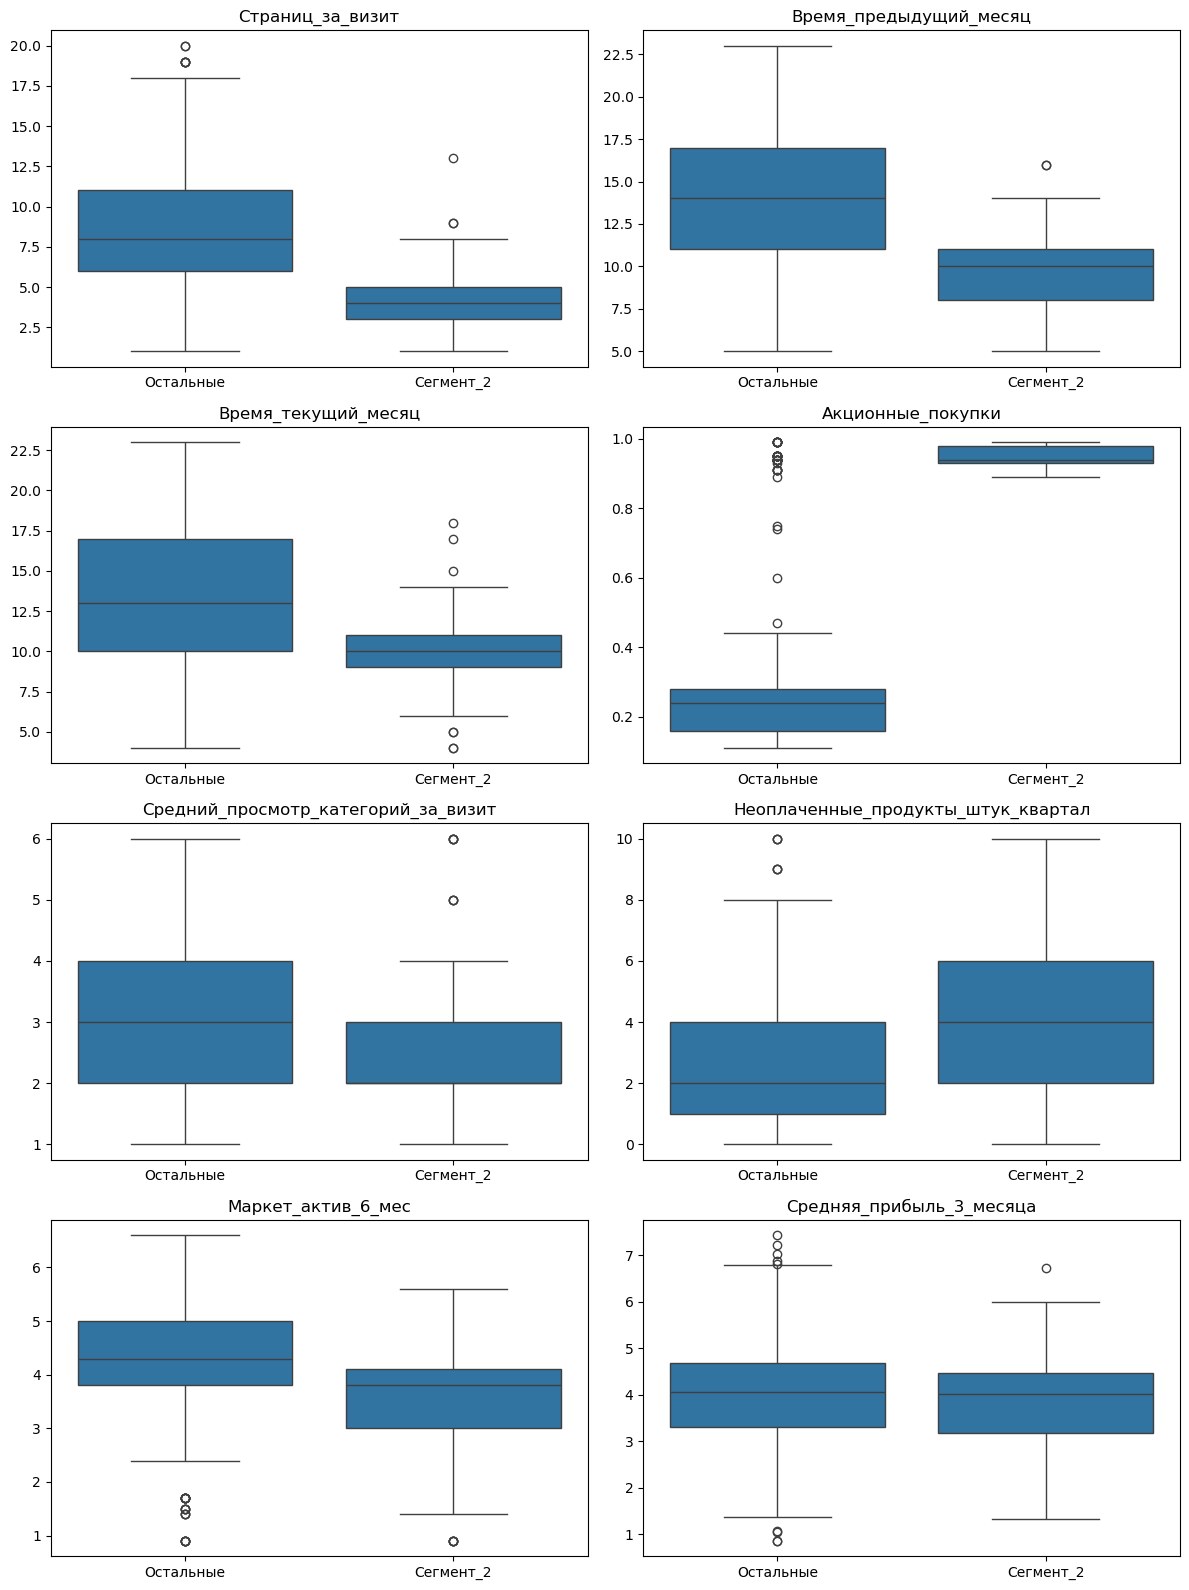

In [70]:
# Построим боксплоты по выбранным признакам для Cегмента 2 (клиентов с высокой вероятностью снижения активности и высокой долей покупок по акции)
# Вспомогательные переменные для построения графиков
n = len(important_features)
ncols = 2
nrows = (n + 1) // ncols
# Создадим маску для сегмента 2
segment_mask_2 = mkt_fin['segment_high_risk_high_promo']

print(f"Аналитика по Сегменту 2: {segment_mask_2.sum()} клиентов (high risk & high promo)")

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

for i, feature in enumerate(important_features):
    sns.boxplot(
        data=mkt_fin,
        x=segment_mask_2.map({True: 'Сегмент_2', False: 'Остальные'}),
        y=feature,
        ax=axes[i]
    )
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### Выводы и рекомендации по анализу сегмента 2 (segment_high_risk_high_promo):

**1. Основные выводы по сегменту:**
- Сегмент 2 включает клиентов с высокой вероятностью снижения покупательской активности и максимальной долей покупок по акции.
- По графикам видно, что у этих клиентов:
    - Доля акционных покупок существенно выше, чем у остальных — это ключевая особенность сегмента.
    - В среднем меньше страниц за визит и меньше времени на сайте, что также характерно для клиентов с риском снижения активности.
    - Средний просмотр категорий за визит часто ниже, чем у остальных, что говорит о снижении вовлечённости и интереса к ассортименту.
    - Число неоплаченных товаров часто выше, чем у остальных - что может говорить о сложностях с оформлением заказа.
    - Маркетинговая активность за 6 месяцев может быть ниже или на уровне остальных клиентов.
    - Средняя прибыль от этих клиентов может быть слегка ниже или находиться на уровне остальных клиентов, но всё равно значима для бизнеса.

**2. Рекомендации бизнесу:**
- Сфокусироваться на удержании этих клиентов, так как они чувствительны к акциям и могут уйти при отсутствии выгодных предложений.
- Разработать персональные программы лояльности, которые выходят за рамки стандартных акций — например, бонусы за регулярные покупки, эксклюзивные предложения, накопительные скидки.
- Постепенно снижать зависимость клиентов от акций: предлагать ценность не только через скидки, но и через сервис, ассортимент, персональные рекомендации.
- Стимулировать вовлечённость: мотивировать к просмотру новых категорий, запускать геймификацию, предлагать бонусы за активность на сайте.
- Анализировать причины снижения времени на сайте и числа просмотренных страниц — возможно, предложения вне акций не воспринимаются как ценные.
- Использовать персонализированные коммуникации, чтобы напоминать о новых поступлениях и выгодных предложениях, но не только в формате скидок.
- Изучить барьеры для оплаты товаров, чтобы снизить число неоплаченных заказов.

**Итог: Сегмент 2 — это группа клиентов, ориентированных на акции, которые при отсутствии выгодных предложений быстро теряют интерес. Для удержания важно развивать не только акционные механики, но и другие инструменты лояльности и вовлечённости, чтобы повысить ценность компании для этих клиентов и снизить их чувствительность к скидкам.**

### Сегмент 3 - наиболеее популярная категория покупок - Мелкая бытовая техника и электроника (товары с длинным жизненным циклом)

Аналитика по Сегменту 3: 174 клиентов (only tech category)


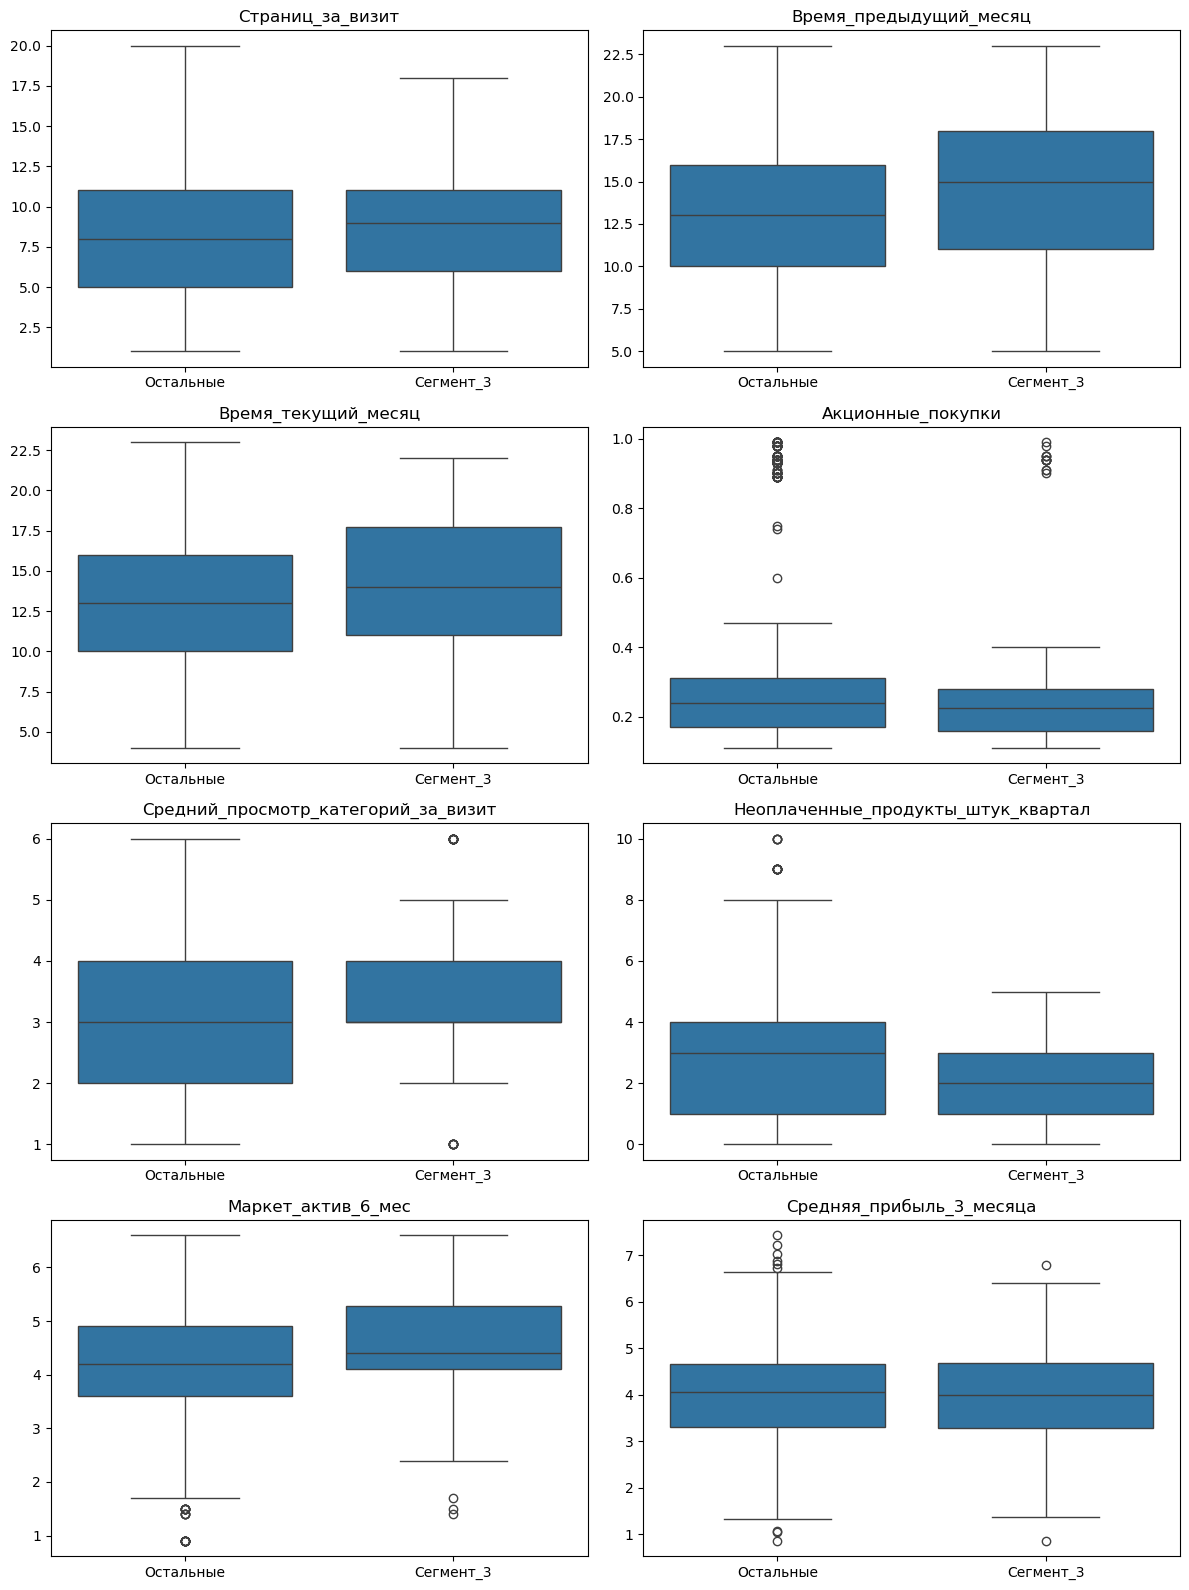

In [71]:
# Построим боксплоты по выбранным признакам для Cегмента 3 (клиентов с наиболее популярной категорией покупок - Мелкая бытовая техника и электроника)
# Вспомогательные переменные для построения графиков
n = len(important_features)
ncols = 2
nrows = (n + 1) // ncols
# Создадим маску для сегмента 3
segment_mask_3 = mkt_fin['segment_only_tech']

print(f"Аналитика по Сегменту 3: {segment_mask_3.sum()} клиентов (only tech category)")

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

for i, feature in enumerate(important_features):
    sns.boxplot(
        data=mkt_fin,
        x=segment_mask_3.map({True: 'Сегмент_3', False: 'Остальные'}),
        y=feature,
        ax=axes[i]
    )
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### Выводы и рекомендации по анализу Сегмента 3 (segment_only_tech):

**1. Основные выводы по сегменту:**
- Сегмент 3 включает клиентов, для которых наиболее популярная категория покупок — «Мелкая бытовая техника и электроника» (товары с длинным жизненным циклом).
- По графикам видно, что различия между этими клиентами и остальными выглядят минимальными — распределения по большинству признаков очень похожи. Для большинства признаков - например, `Страниц_за_визит`, `Время_предыдущий_месяц`, `Время_текущий_месяц`, `Маркет_актив_6_мес`, `Средняя_прибыль_3_месяца`, `Акционные_покупки` - различия между сегментом и остальными клиентами визуально незначимы.
- Средний просмотр категорий за визит немного выше для основной части клиентов сегмента, нежели чем у основной части остальных клиентов, а количество неоплаченных товаров за квартал, наоборот, слегка ниже. Клиенты сегмента чаще исследуют ассортимент и реже оставляют товары неоплаченными.

**2. Рекомендации бизнесу:**
- Для удержания клиентов этого сегмента важно стимулировать повторные покупки и вовлечённость, несмотря на длительный жизненный цикл основной категории.
- Развивать кросс-продажи: предлагать сопутствующие товары, аксессуары, сервисные услуги, расширенные гарантии, чтобы увеличить частоту покупок.
- Использовать персонализированные рекомендации на основе предыдущих покупок техники — предлагать новые модели, обновления, товары для дома и семьи.
- Акцентировать внимание на сервисе: быстрая доставка, установка, поддержка, программы лояльности для покупателей техники, программы trade-in.
- Проводить специальные акции и предложения для этого сегмента, чтобы повысить их интерес к другим категориям товаров.
- Анализировать причины низкой вовлечённости в маркетинговые коммуникации — возможно, стоит изменить формат рассылок или предложить эксклюзивные предложения.
- Мотивировать клиентов исследовать ассортимент сайта, например, через бонусы за просмотр новых категорий или участие в акциях.

**Итог: Сегмент 3 — это клиенты, ориентированные на покупку техники, которые совершают покупки реже, но могут приносить высокий средний чек. Для увеличения их активности важно развивать кросс-продажи, персонализировать предложения и стимулировать интерес к другим категориям товаров, а также повышать вовлечённость в коммуникации с брендом.**

## Вывод по разделу

В данном разделе была проведена сегментация клиентов на основе результатов моделирования и анализа данных о прибыльности и поведении покупателей. Были выделены три ключевых сегмента:

1. **Клиенты с высокой вероятностью снижения активности и высокой прибылью** — это наиболее ценные для бизнеса клиенты, находящиеся в зоне риска. Для их удержания рекомендуется персонализировать маркетинговые коммуникации, стимулировать вовлечённость и устранять барьеры к покупке.

2. **Клиенты с высокой вероятностью снижения активности и максимальной долей покупок по акции** — это группа, чувствительная к скидкам и акциям. Для повышения их лояльности важно развивать дополнительные программы поощрения, персонализированные предложения и снижать зависимость от акций.

3. **Клиенты, для которых наиболее популярна категория "Мелкая бытовая техника и электроника"** — такие клиенты совершают покупки реже из-за длительного жизненного цикла товаров, но могут приносить высокий средний чек. Для увеличения их активности рекомендуется развивать кросс-продажи, предлагать сопутствующие товары и персонализированные рекомендации, дополнительные сервисные программы и программы trade-in для мотивации обновлять свои устройства.

**Для каждого сегмента были проведены графический и описательный анализ, а также даны конкретные рекомендации по повышению покупательской активности. Такой подход позволяет бизнесу точечно работать с разными группами клиентов, повышать их лояльность и предотвращать снижение активности, что в итоге способствует росту прибыли и удержанию клиентской базы.**

# Шаг 9. Общий вывод по проекту
**В рамках данного проекта необходимо было решить 2 основные задачи:**
1.	Разработать модель, которая предскажет вероятность снижения покупательской активности.
2.	Выделить сегменты покупателей, проанализировать их и выработать предложения, как увеличить покупательскую активность сегментов. Для сегментации необходимо было использовать данные моделирования и данные о прибыли покупателей.

**Ход выполнения проекта:**

**1. Загрузка и первичный анализ данных**

В проекте были загружены и изучены четыре набора данных, содержащих информацию о клиентах, их покупательской активности, выручке, времени на сайте и прибыльности для компании. Проведен первичный анализ структуры, типов данных и наличия пропусков.

**2. Предобработка данных**

Выполнена очистка данных: исправлены опечатки в категориальных признаках, удалены полные дубликаты, обработаны выбросы (удален один аномальный клиент по выручке). Проведена фильтрация клиентов с покупательской активностью не менее трёх месяцев.

**3. Исследовательский анализ данных**

Проведен подробный анализ количественных и категориальных признаков с помощью визуализации и расчета статистик. Выявлены особенности распределений, определены информативные и неинформативные признаки, подтверждено отсутствие пропусков и значимых аномалий.

**4. Объединение таблиц для моделирования**

Данные из разных источников были объединены в единую таблицу по id клиента. Признаки по периодам (выручка, время на сайте) были разнесены по отдельным столбцам. В итоговой таблице остались только клиенты с полной информацией.

**5. Корреляционный анализ**

Проведен анализ взаимосвязей между признаками с помощью Phik-корреляции. Выявлены признаки с высокой мультиколлинеарностью и неинформативные признаки, которые были исключены из дальнейшего моделирования.

**6. Обучение моделей и подбор гиперпараметров с помощью пайплайнов**

Построены пайплайны для подготовки данных для моделирования и обучения моделей. Проведен перебор гиперпараметров для четырёх моделей (KNN, DecisionTree, LogisticRegression, SVC) с помощью GridSearchCV. В качестве основной метрики выбрана recall (охват), чтобы минимизировать пропуск клиентов с реальным снижением активности. Лучшая модель — LogisticRegression с L1-регуляризацией (recall = 0.846 на тестовой выборке).

**7. Анализ важности признаков**

С помощью SHAP-методов определены наиболее значимые признаки для модели: `Страниц_за_визит`, `Время_предыдущий_месяц`, `Время_текущий_месяц`, `Акционные_покупки`, `Средний_просмотр_категорий_за_визит`, `Неоплаченные_продукты_штук_квартал`, `Маркет_актив_6_мес`. Категориальные и финансовые признаки оказались малозначимыми для определения снижения покупательской активности.

**8. Сегментация покупателей и рекомендации**

Проведена сегментация клиентов по результатам моделирования и прибыльности (данные финансового департамента). Выделены ключевые сегменты:
- (1) клиенты с высокой вероятностью снижения покупательской активности и высокой прибылью,
- (2) клиенты с высокой вероятностью снижения покупательской активности и максимальной долей покупок по акциям, 
- (3) клиенты, в покупках которых наиболее популярна техника (товары с длительным жизненным циклом). 

Для каждого сегмента даны рекомендации по удержанию и повышению покупательской активности: персонализация маркетинга, развитие программ лояльности, стимулирование вовлечённости и кросс-продажи.

## Поскольку для представителей бизнеса наибольший интерес представляют бизнес-выводы и рекомендации, в финальном выводе по проекту приведены полные выводы и предложения по каждому сегменту:

### Выводы и рекомендации по анализу сегмента 1 (segment_high_risk_high_profit):

**1. Основные выводы по сегменту:**
- Сегмент 1 включает клиентов с высокой вероятностью снижения покупательской активности и высокой прибылью.
- По графикам видно, что у этих клиентов:
   - Меньше страниц за визит и меньше времени на сайте, чем у остальных — это ключевые признаки риска.
   - Часто доля акционных покупок и количество неоплаченных товаров выше чем у остальных клиентов — клиенты становятся менее вовлечёнными.
   - Средний просмотр категорий за визит ниже, чем у остальных — интерес к ассортименту снижается.
   - Маркетинговая активность за 6 месяцев по части клиентов ниже, чем у остальных.

**2. Рекомендации бизнесу:**
 - Срочно удерживать этих клиентов — они приносят высокую прибыль, но находятся в зоне риска ухода.
 - Персонализировать маркетинговые коммуникации: увеличить частоту и релевантность рассылок, предложить индивидуальные акции.
 - Стимулировать вовлечённость: предлагать бонусы за просмотр новых категорий, запускать персональные рекомендации.
 - Упростить процесс оплаты и оформления заказа, чтобы снизить число неоплаченных товаров.
 - Анализировать причины снижения времени на сайте и числа просмотренных страниц — возможно, сайт стал менее удобным или предложения не соответствуют интересам.
 - Для клиентов с высокой долей акционных покупок — предложить эксклюзивные предложения вне акций, чтобы повысить лояльность.
 - Возможно, выделять отдельных менеджеров, осуществлять приоритетную поддержку.
 - Проводить анализ причин снижения активности: опросы, обратная связь, выявление барьеров для покупок.

**Итог: Сегмент 1 — это ключевая группа для удержания. Потеря этих клиентов приведёт к значительному снижению прибыли. Рекомендуется сфокусироваться на персональном подходе, повышении вовлечённости и устранении барьеров к покупке.**

### Выводы и рекомендации по анализу сегмента 2 (segment_high_risk_high_promo):

**1. Основные выводы по сегменту:**
- Сегмент 2 включает клиентов с высокой вероятностью снижения покупательской активности и максимальной долей покупок по акции.
- По графикам видно, что у этих клиентов:
    - Доля акционных покупок существенно выше, чем у остальных — это ключевая особенность сегмента.
    - В среднем меньше страниц за визит и меньше времени на сайте, что также характерно для клиентов с риском снижения активности.
    - Средний просмотр категорий за визит часто ниже, чем у остальных, что говорит о снижении вовлечённости и интереса к ассортименту.
    - Число неоплаченных товаров часто выше, чем у остальных - что может говорить о сложностях с оформлением заказа.
    - Маркетинговая активность за 6 месяцев может быть ниже или на уровне остальных клиентов.
    - Средняя прибыль от этих клиентов может быть слегка ниже или находиться на уровне остальных клиентов, но всё равно значима для бизнеса.

**2. Рекомендации бизнесу:**
- Сфокусироваться на удержании этих клиентов, так как они чувствительны к акциям и могут уйти при отсутствии выгодных предложений.
- Разработать персональные программы лояльности, которые выходят за рамки стандартных акций — например, бонусы за регулярные покупки, эксклюзивные предложения, накопительные скидки.
- Постепенно снижать зависимость клиентов от акций: предлагать ценность не только через скидки, но и через сервис, ассортимент, персональные рекомендации.
- Стимулировать вовлечённость: мотивировать к просмотру новых категорий, запускать геймификацию, предлагать бонусы за активность на сайте.
- Анализировать причины снижения времени на сайте и числа просмотренных страниц — возможно, предложения вне акций не воспринимаются как ценные.
- Использовать персонализированные коммуникации, чтобы напоминать о новых поступлениях и выгодных предложениях, но не только в формате скидок.
- Изучить барьеры для оплаты товаров, чтобы снизить число неоплаченных заказов.

**Итог: Сегмент 2 — это группа клиентов, ориентированных на акции, которые при отсутствии выгодных предложений быстро теряют интерес. Для удержания важно развивать не только акционные механики, но и другие инструменты лояльности и вовлечённости, чтобы повысить ценность компании для этих клиентов и снизить их чувствительность к скидкам.**

### Выводы и рекомендации по анализу Сегмента 3 (segment_only_tech):

**1. Основные выводы по сегменту:**
- Сегмент 3 включает клиентов, для которых наиболее популярная категория покупок — «Мелкая бытовая техника и электроника» (товары с длинным жизненным циклом).
- По графикам видно, что различия между этими клиентами и остальными выглядят минимальными — распределения по большинству признаков очень похожи. Для большинства признаков - например, `Страниц_за_визит`, `Время_предыдущий_месяц`, `Время_текущий_месяц`, `Маркет_актив_6_мес`, `Средняя_прибыль_3_месяца`, `Акционные_покупки` - различия между сегментом и остальными клиентами визуально незначимы.
- Средний просмотр категорий за визит немного выше для основной части клиентов сегмента, нежели чем у основной части остальных клиентов, а количество неоплаченных товаров за квартал, наоборот, слегка ниже. Клиенты сегмента чаще исследуют ассортимент и реже оставляют товары неоплаченными.

**2. Рекомендации бизнесу:**
- Для удержания клиентов этого сегмента важно стимулировать повторные покупки и вовлечённость, несмотря на длительный жизненный цикл основной категории.
- Развивать кросс-продажи: предлагать сопутствующие товары, аксессуары, сервисные услуги, расширенные гарантии, чтобы увеличить частоту покупок.
- Использовать персонализированные рекомендации на основе предыдущих покупок техники — предлагать новые модели, обновления, товары для дома и семьи.
- Акцентировать внимание на сервисе: быстрая доставка, установка, поддержка, программы лояльности для покупателей техники, программы trade-in.
- Проводить специальные акции и предложения для этого сегмента, чтобы повысить их интерес к другим категориям товаров.
- Анализировать причины низкой вовлечённости в маркетинговые коммуникации — возможно, стоит изменить формат рассылок или предложить эксклюзивные предложения.
- Мотивировать клиентов исследовать ассортимент сайта, например, через бонусы за просмотр новых категорий или участие в акциях.

**Итог: Сегмент 3 — это клиенты, ориентированные на покупку техники, которые совершают покупки реже, но могут приносить высокий средний чек. Для увеличения их активности важно развивать кросс-продажи, персонализировать предложения и стимулировать интерес к другим категориям товаров, а также повышать вовлечённость в коммуникации с брендом.**

## Итог по проекту: 
В результате проекта проведён полный цикл анализа клиентских данных: от очистки и объединения до построения и интерпретации модели, а также сегментации и выработки бизнес-рекомендаций. Полученные результаты позволяют бизнесу точечно работать с разными группами клиентов, повышать их лояльность и предотвращать снижение покупательской активности, что способствует росту прибыли и удержанию клиентской базы.